# Dataset link

### https://www.kaggle.com/datasets/vikramamin/life-expectancy-who/data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from scipy import stats
%matplotlib inline
sns.set(style = "darkgrid", font_scale = 1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

import warnings
warnings.filterwarnings("ignore")

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [76]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [77]:
df.tail(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
2933   27.1                  42   67.0               7.13         65.0   
2934   26.7                  41    7.0               6.52         68.0   
2935   26.3                  40   73.0               6.53         71.0   
2936   25.9                  39   76.0               6.16         75.0   
2937   25.5                  39   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358878  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
2933                  9.4                            0.407        9.2  
2934                  9.9                            0.418        9.5  
2935                  1.3                            0.427       10.0  
2936                  1.7                            0.427        9.8  
2937                 11.2                            0.434        9.8

In [78]:
df.sample(5)

Country  Year      Status  Life expectancy   \
1755              Morocco  2008  Developing              71.8   
2113  Republic of Moldova  2005  Developing              67.3   
1896              Nigeria  2012  Developing              52.7   
2142   Russian Federation  2008  Developing              67.5   
2920               Zambia  2001  Developing              44.6   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
1755            123.0             21     0.51              171.365897   
2113            248.0              1    10.78                0.000000   
1896            374.0            505     8.54              204.718626   
2142            278.0             16    12.04              161.730165   
2920            611.0             43     2.61               46.830275   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  \
1755         97.0      1455   51.7                  24   99.0   
2113         99.0         6   48.3                   1   99.0   
1896         42.0      6447   23.5                 788   42.0   
2142         98.0        27   56.6                  18   98.0   
2920          NaN     16997   17.1                  70   86.0   

      Total expenditure  Diphtheria    HIV/AIDS           GDP   Population  \
1755               5.41         99.0        0.1   2884.947760   31596855.0   
2113               9.15         98.0        0.1           NaN          NaN   
1896               3.30         42.0        4.4   2755.297787  167297284.0   
2142               6.22         98.0        0.3  11635.263700   14274235.0   
2920               6.56         85.0       18.6    378.273624    1824125.0   

       thinness  1-19 years   thinness 5-9 years  \
1755                    6.4                  6.3   
2113                    3.1                  3.3   
1896                    1.7                  1.6   
2142                    2.3                  2.5   
2920                    7.4                  7.4   

      Income composition of resources  Schooling  
1755                            0.589       10.3  
2113                              NaN        NaN  
1896                            0.507        9.7  
2142                            0.769       13.9  
2920                            0.424        9.8

In [79]:
df.columns = df.columns.str.strip().str.title()

In [80]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [81]:
df.rename(columns = {"Thinness  1-19 Years" : "Thinness 1-19 Years"}, inplace = True)

In [82]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  Bmi                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

In [84]:
df.describe().T

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life Expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
Infant Deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
Percentage Expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
Bmi                              2904.0  3.832125e+01  2.004403e+01   
Under-Five Deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total Expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
Hiv/Aids                         2938.0  1.742103e+00  5.077785e+00   
Gdp                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
Thinness 1-19 Years              2904.0  4.839704e+00  4.420195e+00   
Thinness 5-9 Years               2904.0  4.870317e+00  4.508882e+00   
Income Composition Of Resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life Expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
Infant Deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
Percentage Expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
Bmi                                 1.00000      19.300000  4.350000e+01   
Under-Five Deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total Expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
Hiv/Aids                            0.10000       0.100000  1.000000e-01   
Gdp                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
Thinness 1-19 Years                 0.10000       1.600000  3.300000e+00   
Thinness 5-9 Years                  0.10000       1.500000  3.300000e+00   
Income Composition Of Resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life Expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
Infant Deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
Percentage Expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
Bmi                              5.620000e+01  8.730000e+01  
Under-Five Deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total Expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
Hiv/Aids                         8.000000e-01  5.060000e+01  
Gdp            

In [85]:
df.describe(include = ['object']).T

count unique          top  freq
Country  2938    193  Afghanistan    16
Status   2938      2   Developing  2426

# Missing Values

In [86]:
df.isnull().sum().to_frame().rename(columns = {0: "Total No. of Missing Values"})

Total No. of Missing Values
Country                                                    0
Year                                                       0
Status                                                     0
Life Expectancy                                           10
Adult Mortality                                           10
Infant Deaths                                              0
Alcohol                                                  194
Percentage Expenditure                                     0
Hepatitis B                                              553
Measles                                                    0
Bmi                                                       34
Under-Five Deaths                                          0
Polio                                                     19
Total Expenditure                                        226
Diphtheria                                                19
Hiv/Aids                                                   0
Gdp                                                      448
Population                                               652
Thinness 1-19 Years                                       34
Thinness 5-9 Years                                        34
Income Composition Of Resources                          167
Schooling                                                163

## Since Life Expectancy is the target variable and we have only 10 missing values for my target variable
## So we will drop the missing values
## 10 rows is just 0.34% of your dataset — negligible loss.

In [87]:
df = df.dropna(subset = ["Life Expectancy"])

In [88]:
# Total number of rows
total_rows = df.shape[0]

# Number of rows with at least one missing value
rows_with_missing = df.isnull().any(axis=1).sum()

print(f"Total Rows: {total_rows}")
print(f"Rows with Missing Values: {rows_with_missing}")
print(f"Percentage: {rows_with_missing / total_rows * 100:.2f}%")

Total Rows: 2928
Rows with Missing Values: 1279
Percentage: 43.68%


### So we have 43.68% rows which have missing values

### We will treat the missing for:
                    Alcohol", "Percentage Expenditure", "Bmi", "Under-Five Deaths", "Total Expenditure", 
                    "Hiv/Aids", "Gdp", "Population", "Thinness 1-19 Years", 
                    "Thinness 5-9 Years", "Income Composition Of Resources", "SchoolingAdult Mortality 
                    by replacing them with the median value.
### For (Hepatitis B, Polio, Diphtheria) we will treat the missing by replacing them with the mode.

In [89]:
# Fill Life Expectancy & Adult Mortality with median per Status group
df["Adult Mortality"] = df.groupby("Status")["Adult Mortality"].transform(lambda x: x.fillna(x.median()))

# Mode imputation for vaccine- related discrete data
for col in ["Hepatitis B","Polio","Diphtheria"]:
    df[col] = df[col].fillna(df[col].mode()[0])

# Median imputation for continuous/skewed columns
median_impute_cols = ["Alcohol", "Percentage Expenditure", "Bmi", "Under-Five Deaths", "Total Expenditure", 
                      "Hiv/Aids", "Gdp", "Population", "Thinness 1-19 Years", 
                      "Thinness 5-9 Years", "Income Composition Of Resources", "Schooling"]
for col in median_impute_cols:
    df[col] = df[col].fillna(df[col].median())

## We are doing the fillna with median separately in Adult Mortality because in the
## Developed country and Developing country the Adult Mortality rate would be different

# Ckecking the missing values after treating

In [90]:
df.isnull().sum().to_frame().rename(columns = {0: "Total No. of Missing Values"})

Total No. of Missing Values
Country                                                    0
Year                                                       0
Status                                                     0
Life Expectancy                                            0
Adult Mortality                                            0
Infant Deaths                                              0
Alcohol                                                    0
Percentage Expenditure                                     0
Hepatitis B                                                0
Measles                                                    0
Bmi                                                        0
Under-Five Deaths                                          0
Polio                                                      0
Total Expenditure                                          0
Diphtheria                                                 0
Hiv/Aids                                                   0
Gdp                                                        0
Population                                                 0
Thinness 1-19 Years                                        0
Thinness 5-9 Years                                         0
Income Composition Of Resources                            0
Schooling                                                  0

# Clearly after treating them we don't have any missing values

# Checking if there is any duplicated values

In [91]:
df.duplicated().sum()

0

In [92]:
numerical_df = df.select_dtypes(include = [np.number])
numerical_df.head(5)

Year  Life Expectancy  Adult Mortality  Infant Deaths  Alcohol  \
0  2015             65.0            263.0             62     0.01   
1  2014             59.9            271.0             64     0.01   
2  2013             59.9            268.0             66     0.01   
3  2012             59.5            272.0             69     0.01   
4  2011             59.2            275.0             71     0.01   

   Percentage Expenditure  Hepatitis B  Measles   Bmi  Under-Five Deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total Expenditure  Diphtheria  Hiv/Aids         Gdp  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness 1-19 Years  Thinness 5-9 Years  Income Composition Of Resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [93]:
categorical_df = df.select_dtypes(include = ['object'])
categorical_df.head(5)

Country      Status
0  Afghanistan  Developing
1  Afghanistan  Developing
2  Afghanistan  Developing
3  Afghanistan  Developing
4  Afghanistan  Developing

# Correlation 

In [94]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

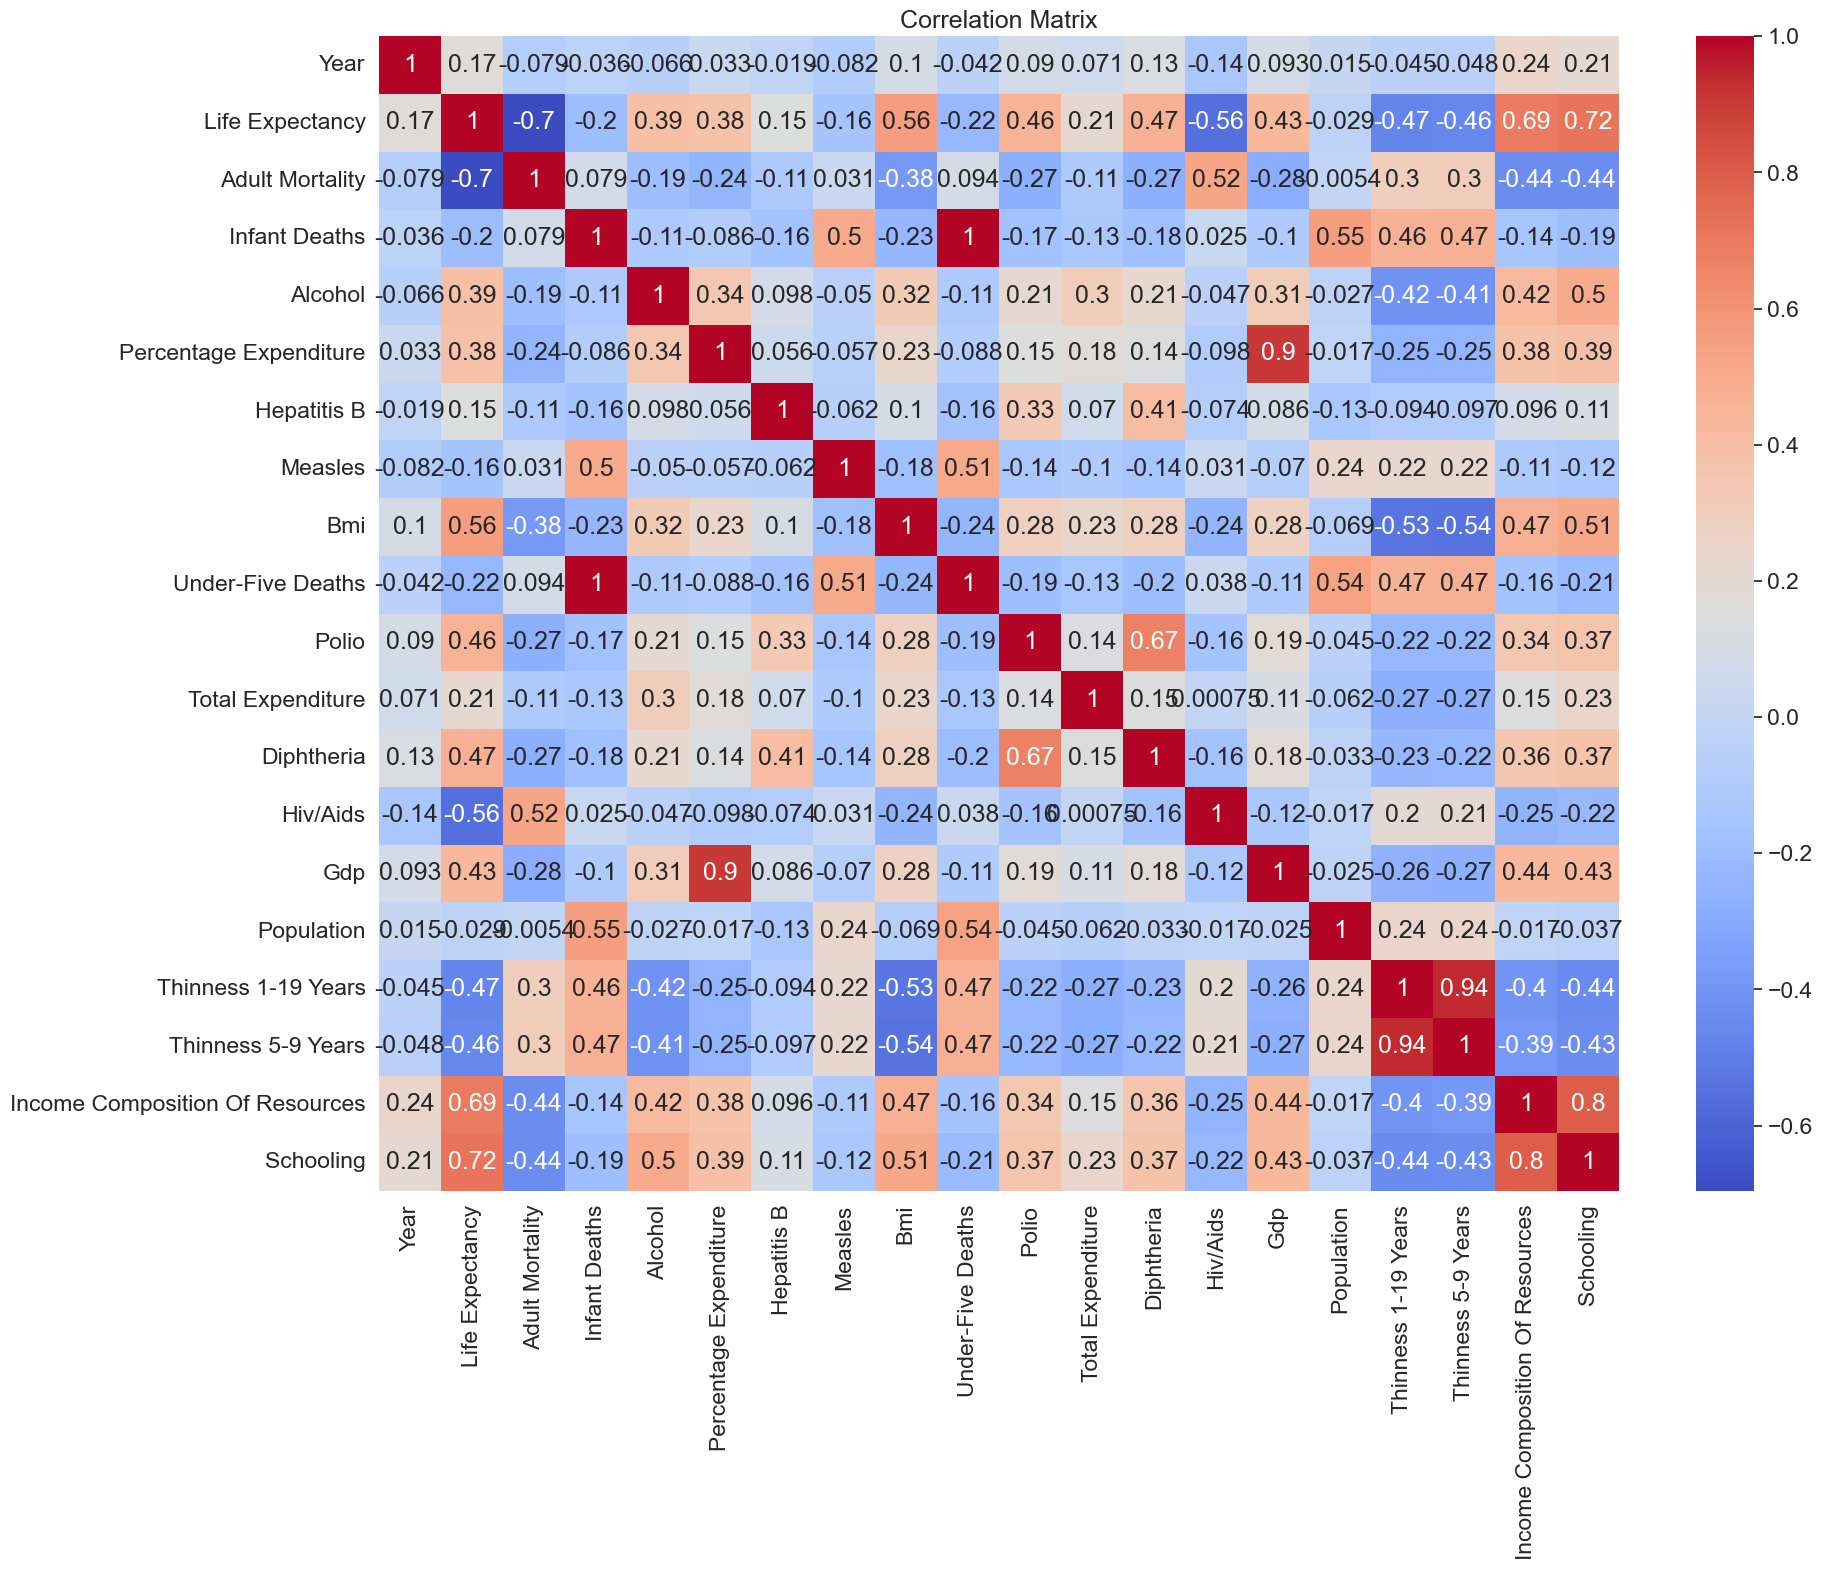

In [95]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

## From the above plot we can say that there is a very high corelation between 
1) infant deaths and under-five deaths
2) percentage expenditure and GDP
3) Income composition of resources and Schooling
4) Life expectancy and Income composition of resources
5) Schooling and Life expectancy

# Univariate Analysis (Single Variable)

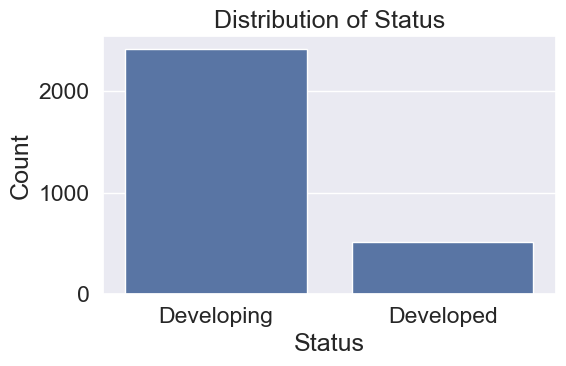

In [96]:
plt.figure(figsize = (6,4))
sns.countplot(x='Status', data=df)
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Distribution of Status")
plt.tight_layout()
plt.show()

# Developing countries are more compared to the Developed Nation

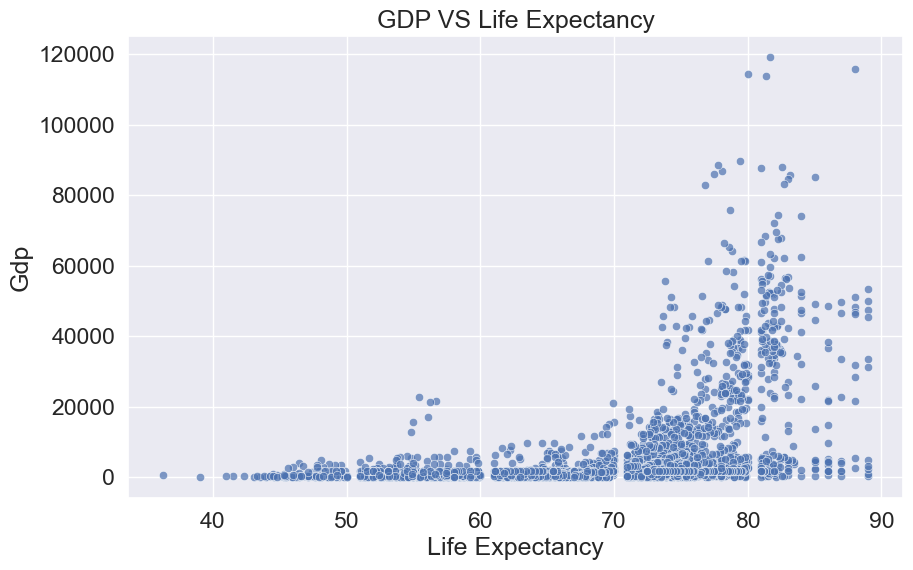

In [97]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "Life Expectancy", y = "Gdp", palette = "virdis", alpha = 0.7)
plt.title("GDP VS Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Gdp")
plt.grid(True)
plt.tight_layout
plt.show()

# Most people live within the Gdp 0-20000 

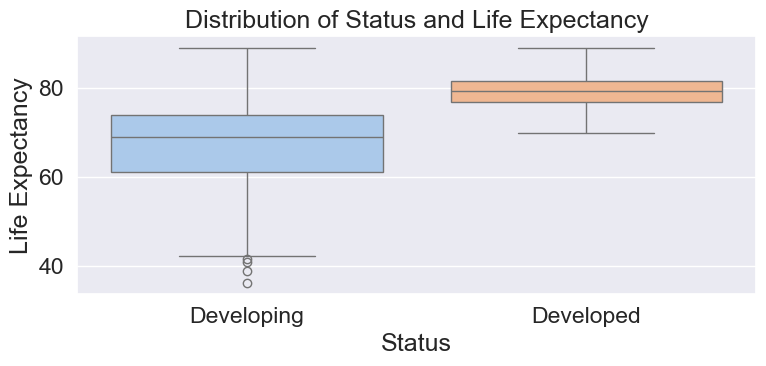

In [98]:
plt.figure(figsize = (8,4))
sns.boxplot(data = df, x = "Status", y = "Life Expectancy", palette = 'pastel')
plt.title("Distribution of Status and Life Expectancy")
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.tight_layout()
plt.show()

## From the above boxplot we can infer that:
1) Min Life Expectancy of the Deploped Nation is nearly 70 which is very good.
2) But in Developing Natiom Min Life Expectancy is 42-43 which is very bad considering its a developing nation

# Temporal Analysis (Using Year)

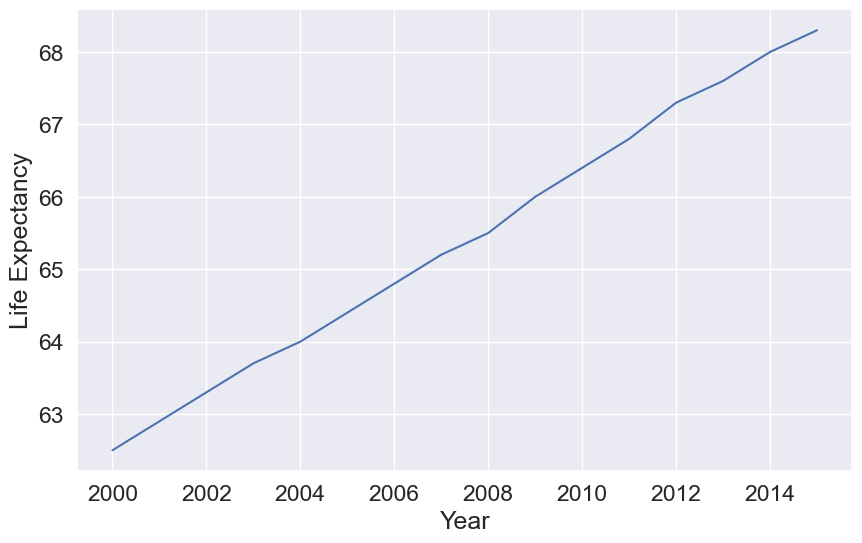

In [99]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df[df["Country"] == "India"], x = "Year", y = "Life Expectancy")
plt.show()

# From this graph we can clearly see that in India the Life Expectancy is increasing every year

# Checking for other countries

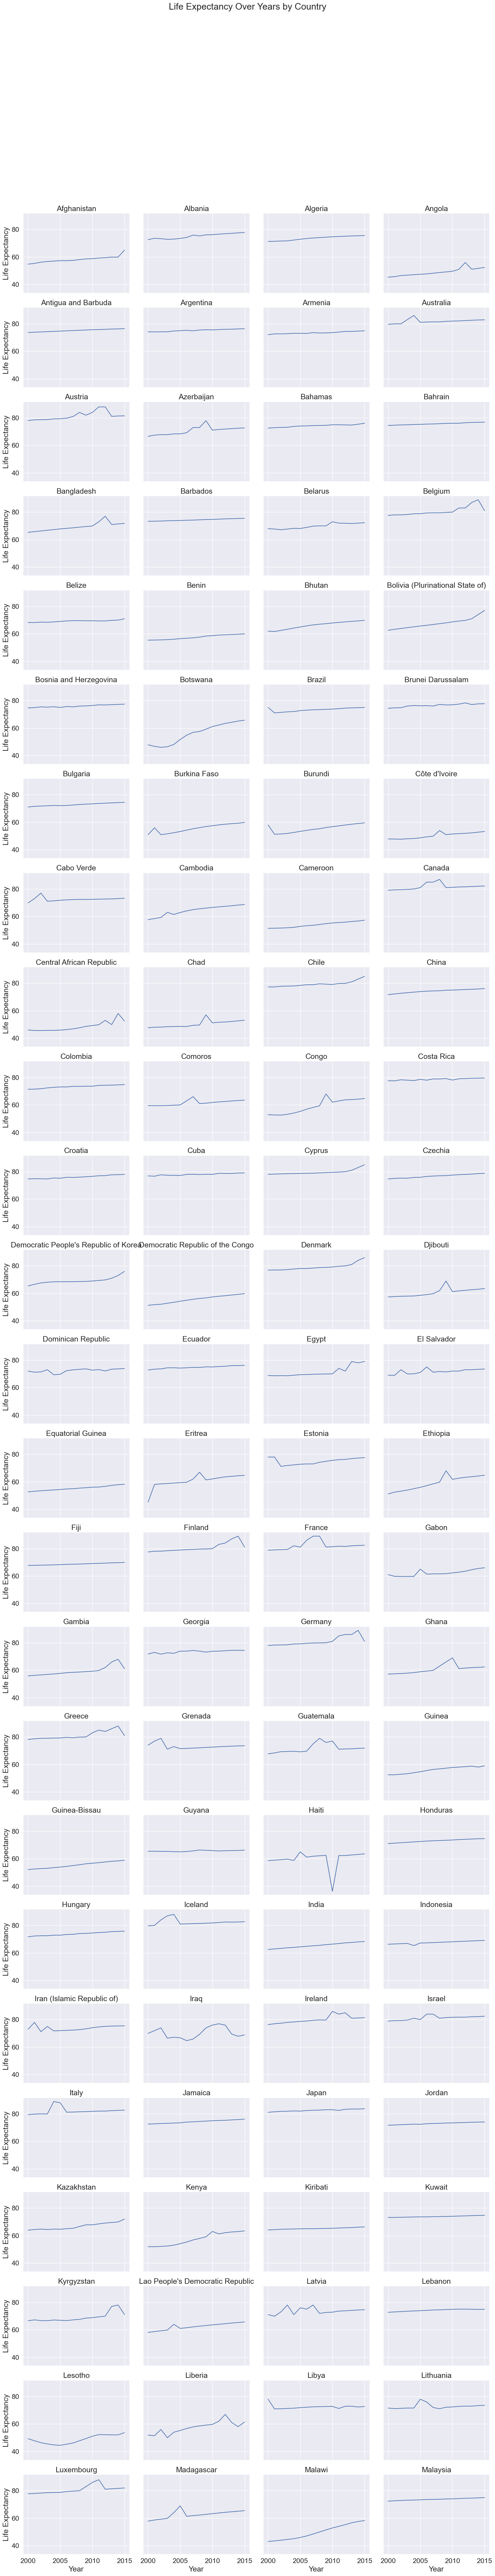

In [100]:
# Limit to fewer countries to keep it readable (you can remove this filter for all)
sample_countries = df['Country'].unique()[:100]  # First 12 countries
df_sample = df[df['Country'].isin(sample_countries)]

# Create facet grid
g = sns.FacetGrid(df_sample, col="Country", col_wrap=4, height=3.5, aspect=1.2)
g.map(sns.lineplot, "Year", "Life Expectancy")

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Life Expectancy")
g.tight_layout()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Life Expectancy Over Years by Country")
plt.show()

### In most of the countries the Life Expectancy is increasing
## Whereas in some countries there is some fluctuations in the Life Epectancy but over all its increasing over time.

### Checking and Treating the outlier

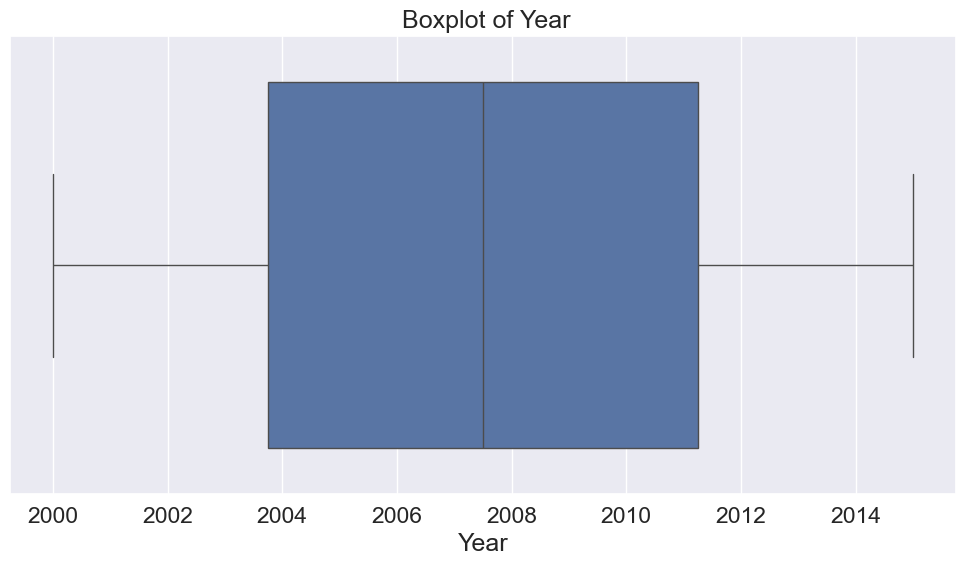

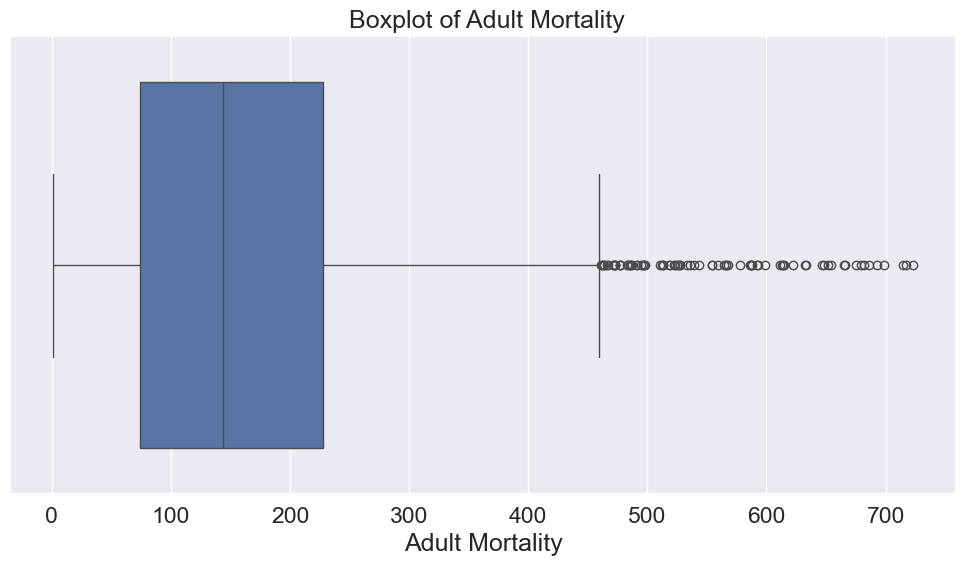

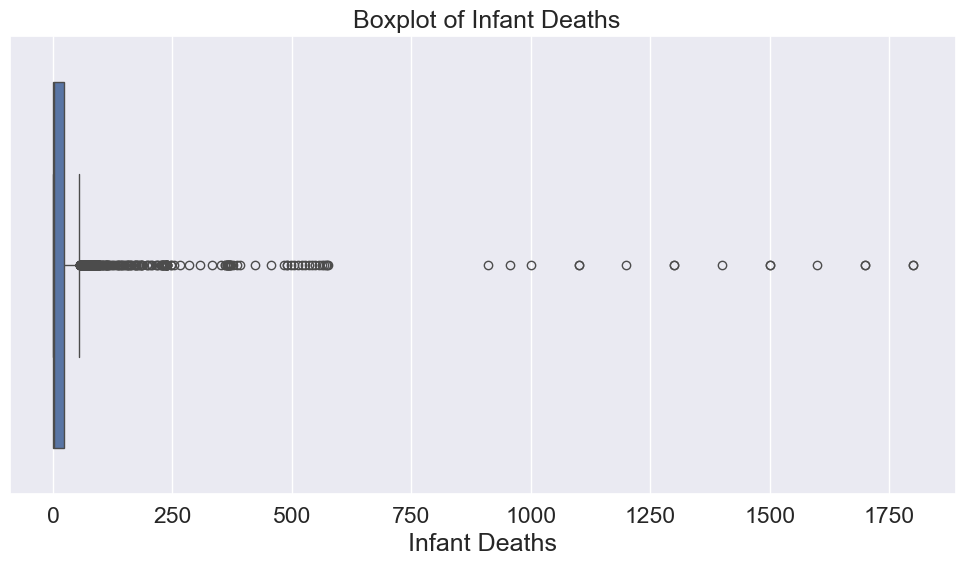

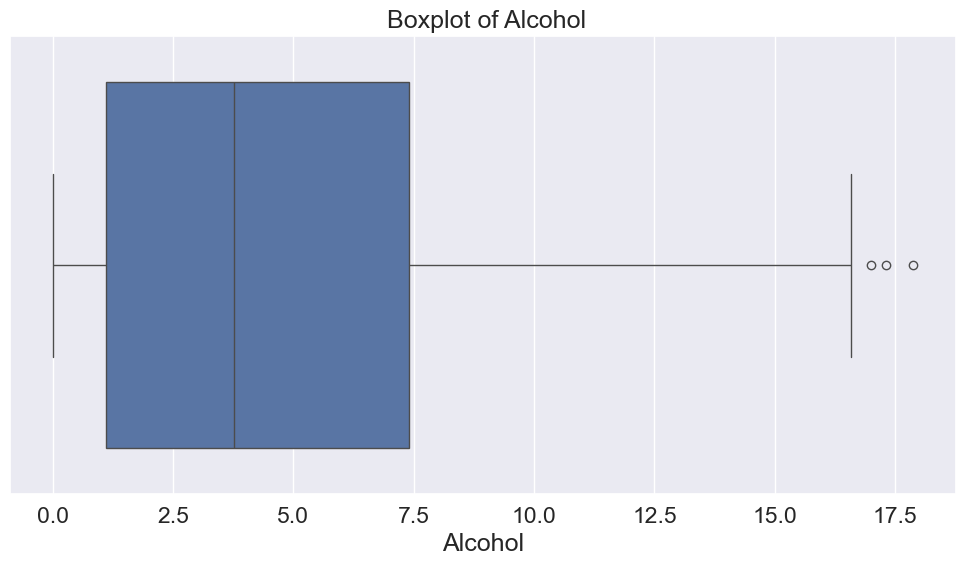

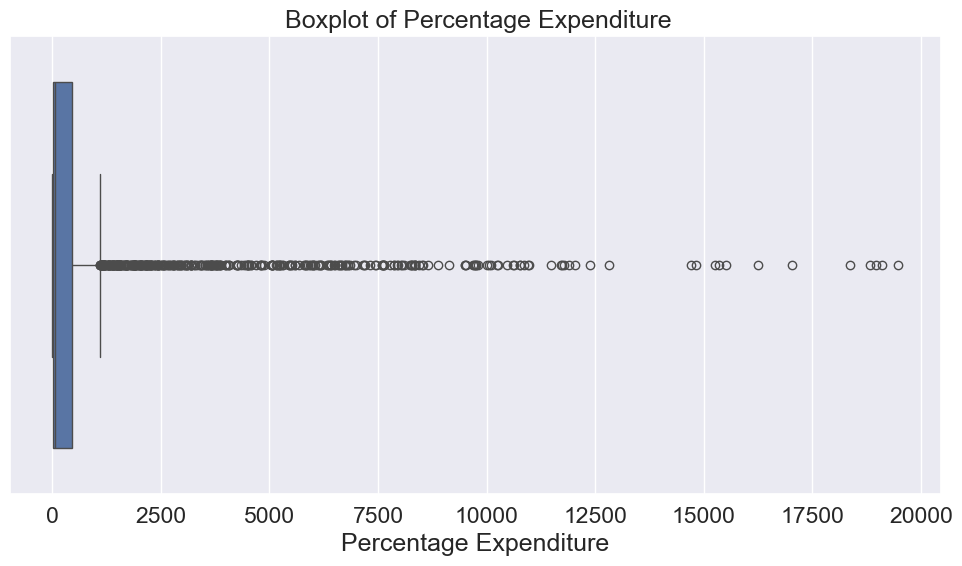

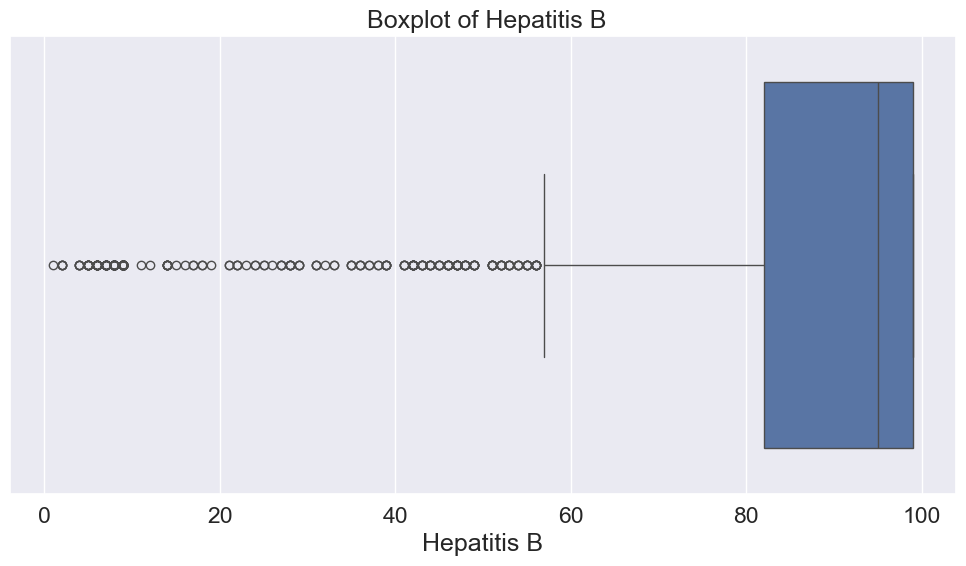

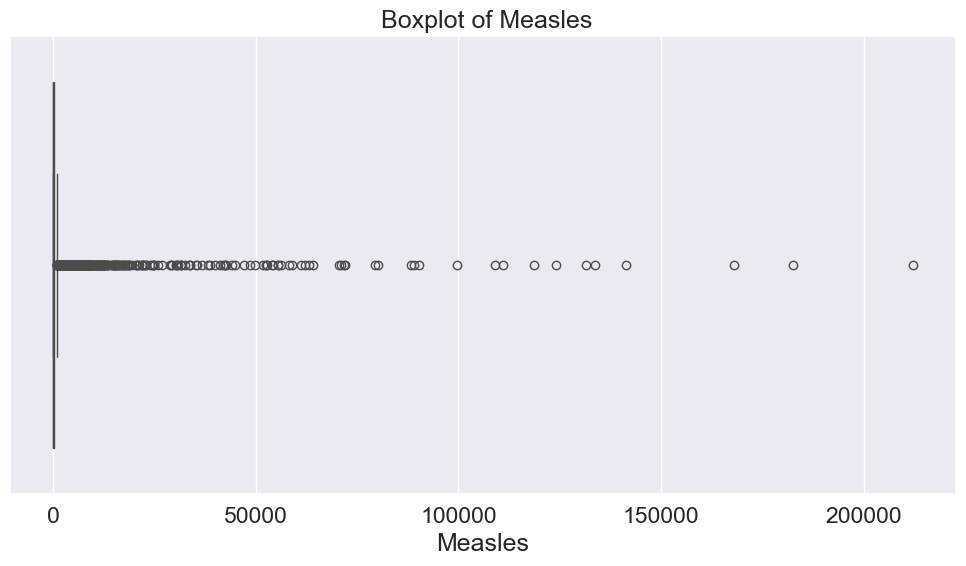

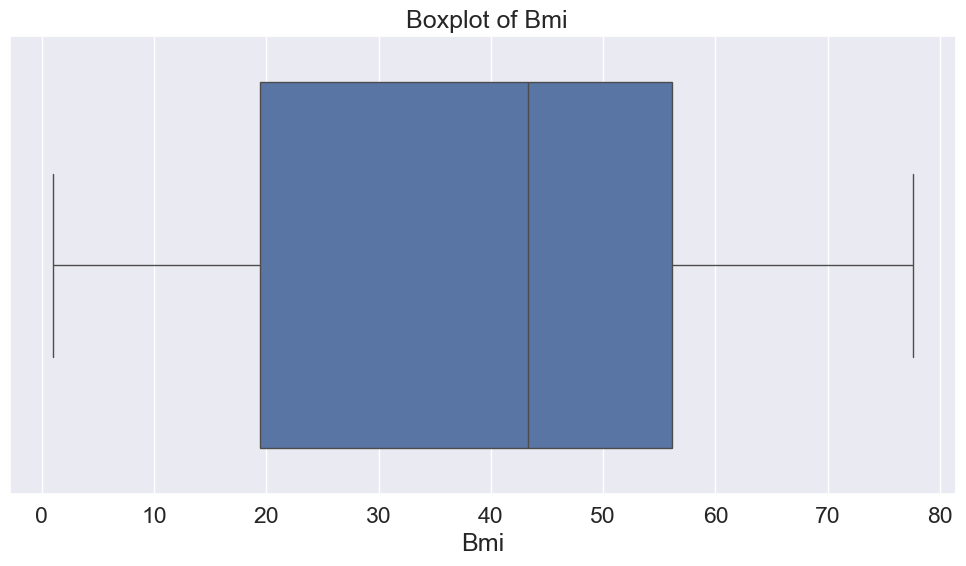

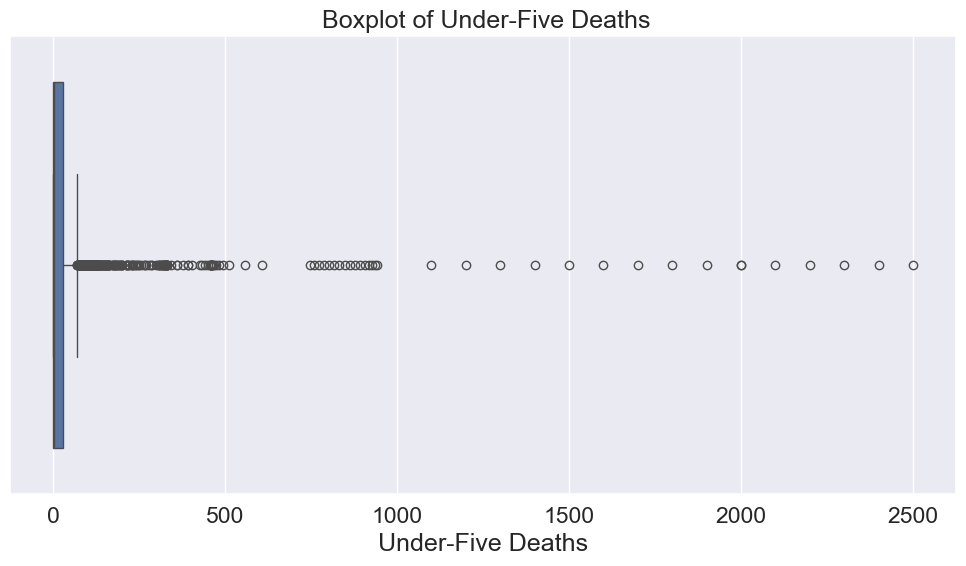

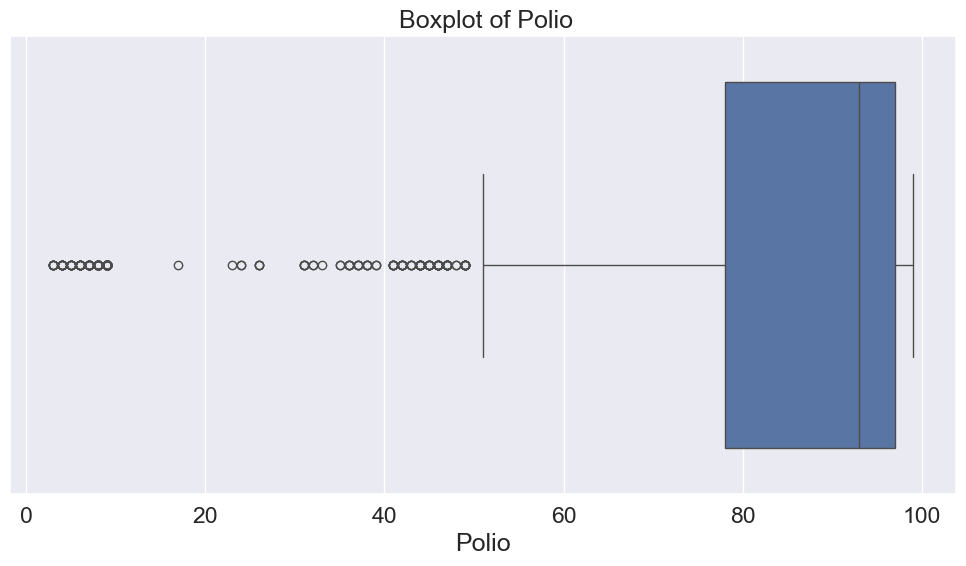

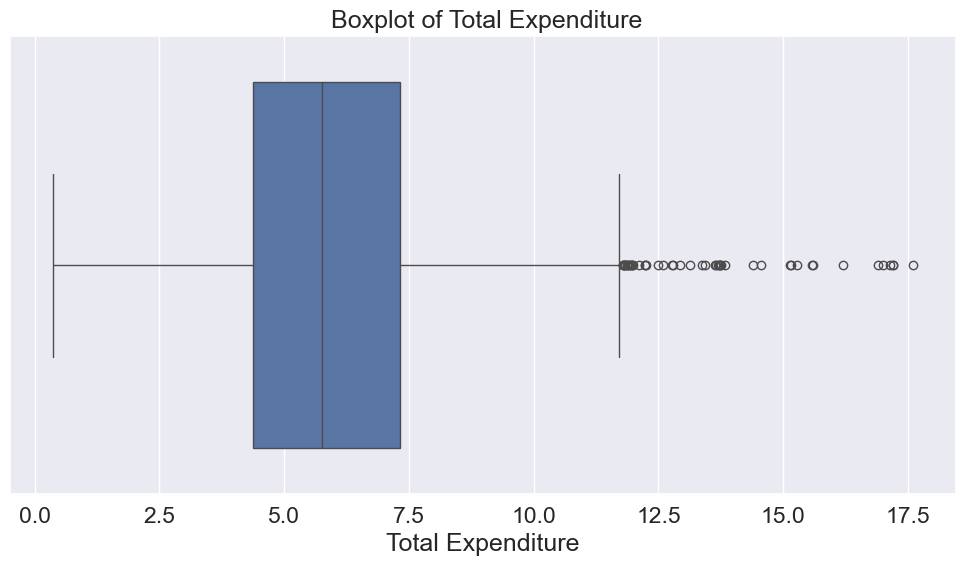

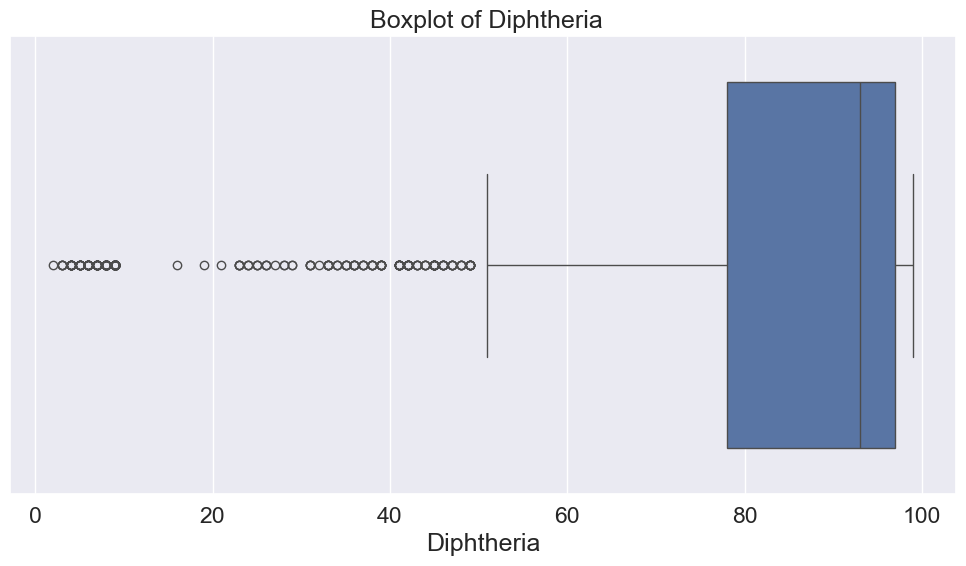

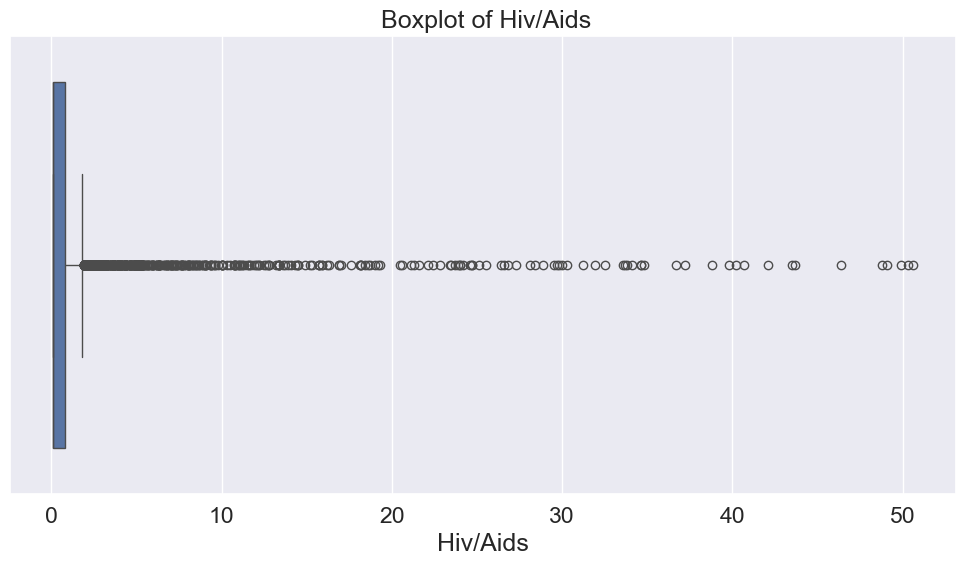

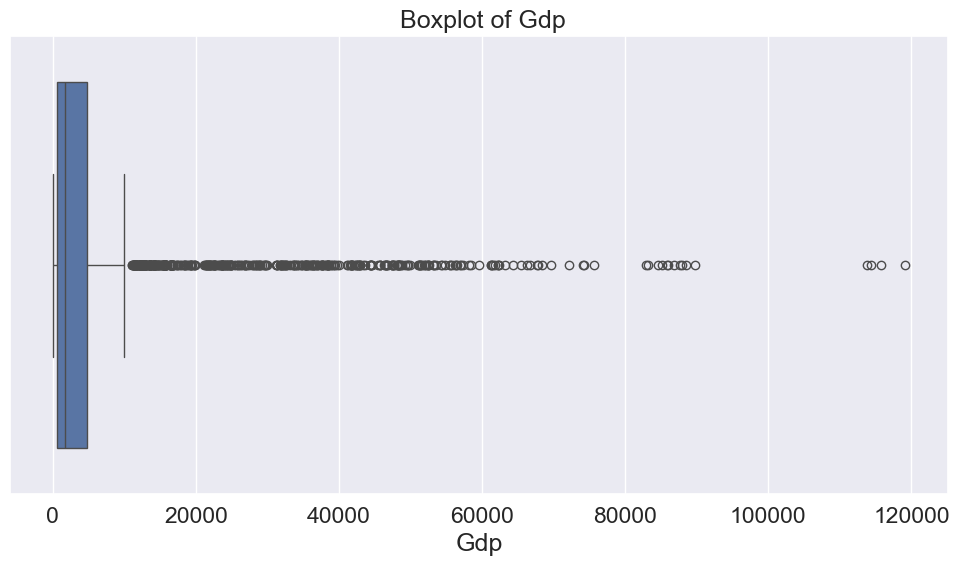

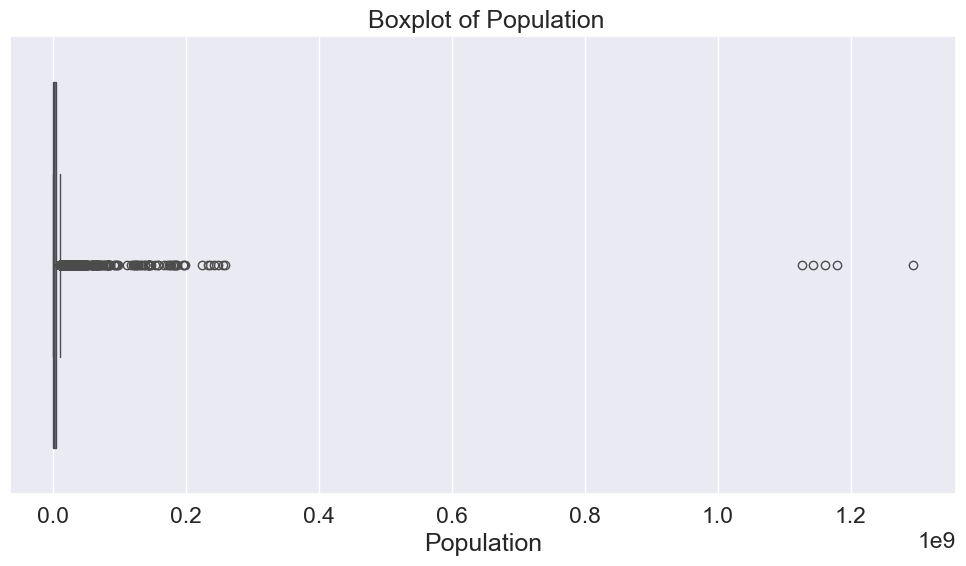

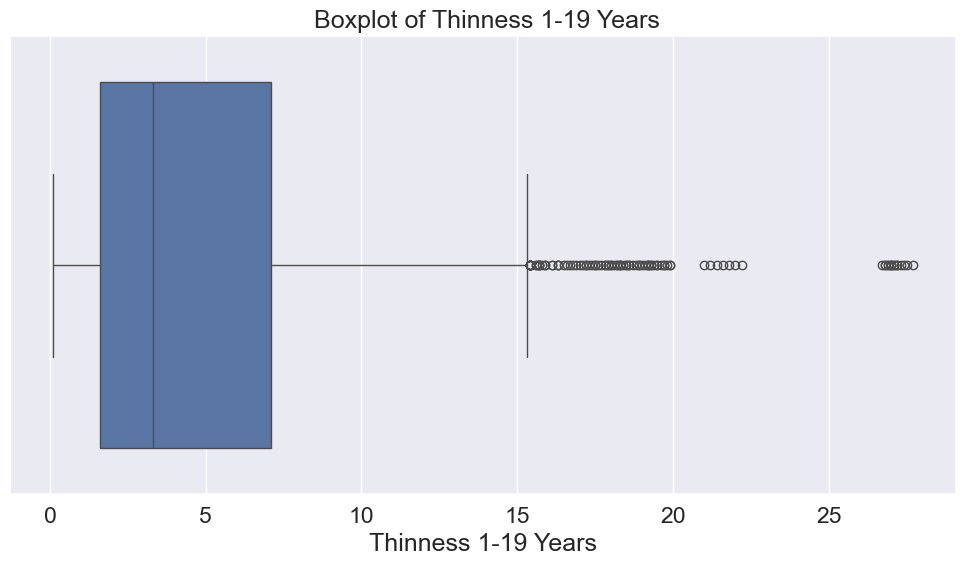

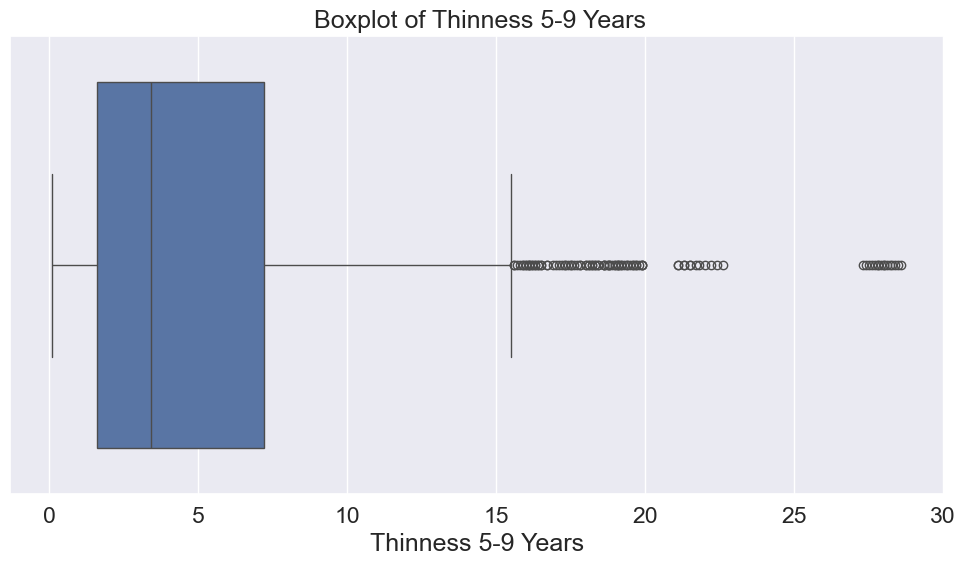

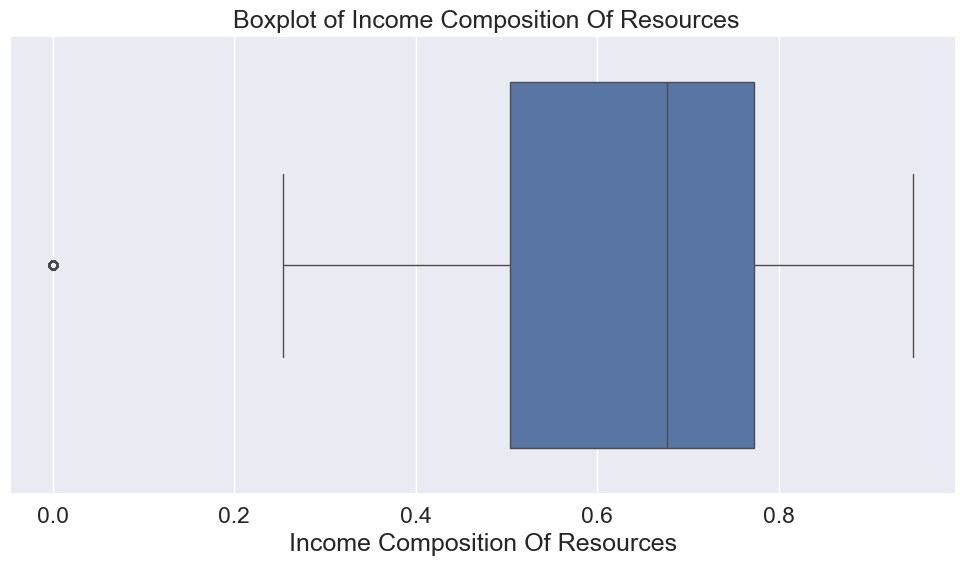

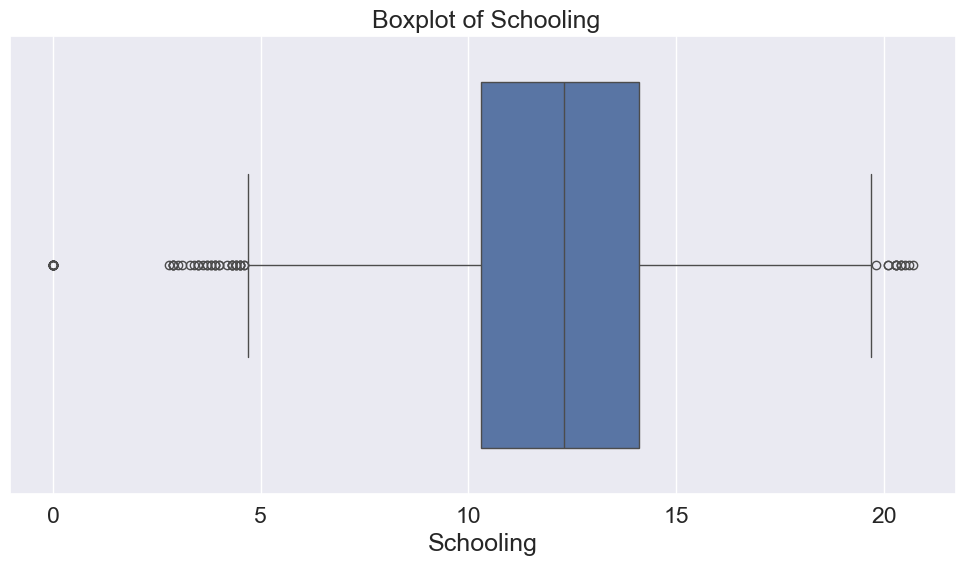

In [101]:
numerical_cols = df.select_dtypes(include = ["number"]).drop(columns = ["Life Expectancy"]).columns
for col in numerical_cols:
    plt.figure(figsize = (10,6))
    sns.boxplot(x = df[col])
    plt.title(f" Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# From the above boxplot we can see that there are outliers in 
1) Adult Mortality
2) Infant Deaths
3) Alcohol
4) Percentage Expenditure
5) Hepatitis B
6) Measles
7) Under-Five Deaths
8) Polio
9) Total Expenditure
10) Diphtheria
11) HIV/AIDs
12) GDP
13) Population
14) Thinness 1-19 Years
15) Thinness 5-9 Years
16) Income Composition Of Resources
17) Schooling

In [102]:
def detect_outlier_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Apply the function to each numeric column
for col in numerical_cols:
    outliers = detect_outlier_iqr(df[col])
    print(f"Columns : {col} | Outlier Detected : {len(outliers)}")


Columns : Year | Outlier Detected : 0
Columns : Adult Mortality | Outlier Detected : 82
Columns : Infant Deaths | Outlier Detected : 315
Columns : Alcohol | Outlier Detected : 3
Columns : Percentage Expenditure | Outlier Detected : 388
Columns : Hepatitis B | Outlier Detected : 303
Columns : Measles | Outlier Detected : 542
Columns : Bmi | Outlier Detected : 0
Columns : Under-Five Deaths | Outlier Detected : 394
Columns : Polio | Outlier Detected : 278
Columns : Total Expenditure | Outlier Detected : 49
Columns : Diphtheria | Outlier Detected : 297
Columns : Hiv/Aids | Outlier Detected : 542
Columns : Gdp | Outlier Detected : 445
Columns : Population | Outlier Detected : 452
Columns : Thinness 1-19 Years | Outlier Detected : 100
Columns : Thinness 5-9 Years | Outlier Detected : 99
Columns : Income Composition Of Resources | Outlier Detected : 130
Columns : Schooling | Outlier Detected : 75


# We will check how many rows have outliers out of the total rows

In [103]:
numerical_cols = df.select_dtypes(include = ["number"]).drop(columns = ["Life Expectancy"]).columns

In [104]:
outlier_rows = set()

for col in numerical_cols:
    outliers = detect_outlier_iqr(df[col])
    outlier_rows.update(outliers.index) # Add the index of outlier rows to the set
    
print(f"Rows with at least one outlier: {len(outlier_rows)} / {len(df)}")
print(f"Percentage: ({len(outlier_rows)} / {len(df)}) * 100 = {(len(outlier_rows) / len(df)) * 100:.2f}%")


Rows with at least one outlier: 1870 / 2928
Percentage: (1870 / 2928) * 100 = 63.87%


### Around 1764 rows have outliers which is 63.87% out of total rows. 
### So we will go with capping method 

In [105]:
df_capped = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_capped[col] = df[col].clip(lower, upper) # capping the values

# Checking outliers after treating

In [106]:
# Check for outliers after capping
print("\n Outliers after capping:")

for col in numerical_cols:
    outliers = detect_outlier_iqr(df_capped[col]) 
    print(f"Column: {col} | Outlier Detected: {len(outliers)}")


 Outliers after capping:
Column: Year | Outlier Detected: 0
Column: Adult Mortality | Outlier Detected: 0
Column: Infant Deaths | Outlier Detected: 0
Column: Alcohol | Outlier Detected: 0
Column: Percentage Expenditure | Outlier Detected: 0
Column: Hepatitis B | Outlier Detected: 0
Column: Measles | Outlier Detected: 0
Column: Bmi | Outlier Detected: 0
Column: Under-Five Deaths | Outlier Detected: 0
Column: Polio | Outlier Detected: 0
Column: Total Expenditure | Outlier Detected: 0
Column: Diphtheria | Outlier Detected: 0
Column: Hiv/Aids | Outlier Detected: 0
Column: Gdp | Outlier Detected: 0
Column: Population | Outlier Detected: 0
Column: Thinness 1-19 Years | Outlier Detected: 0
Column: Thinness 5-9 Years | Outlier Detected: 0
Column: Income Composition Of Resources | Outlier Detected: 0
Column: Schooling | Outlier Detected: 0


# Visualization after treating the outlier

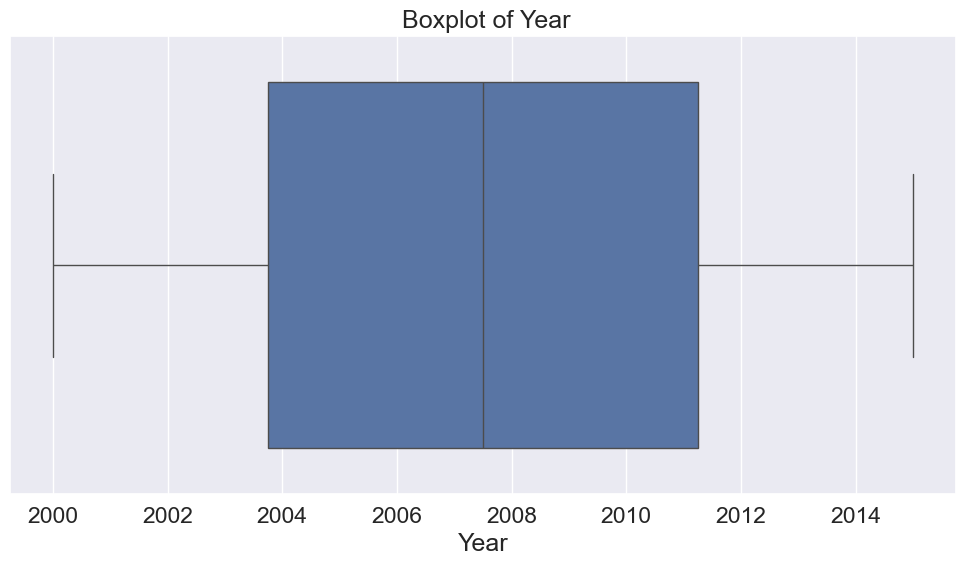

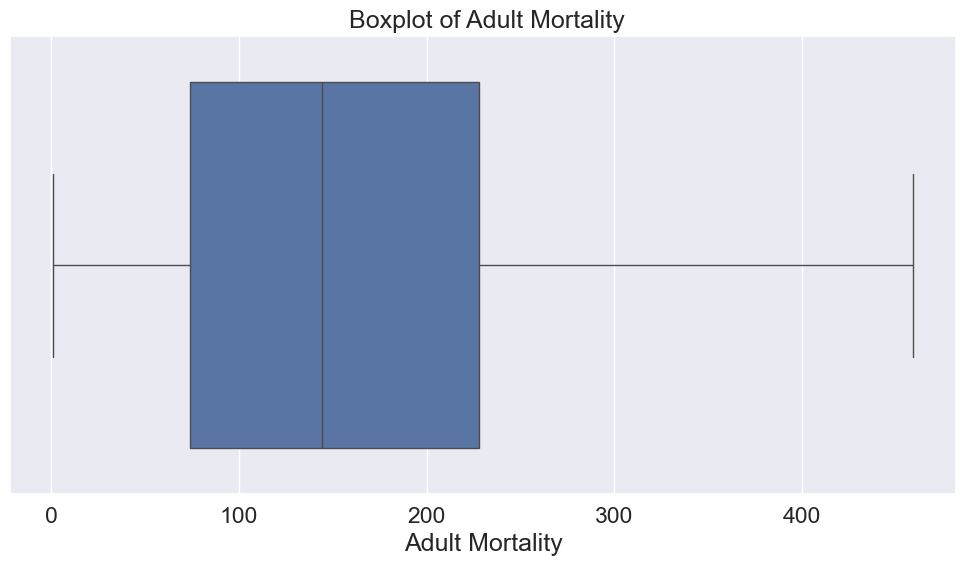

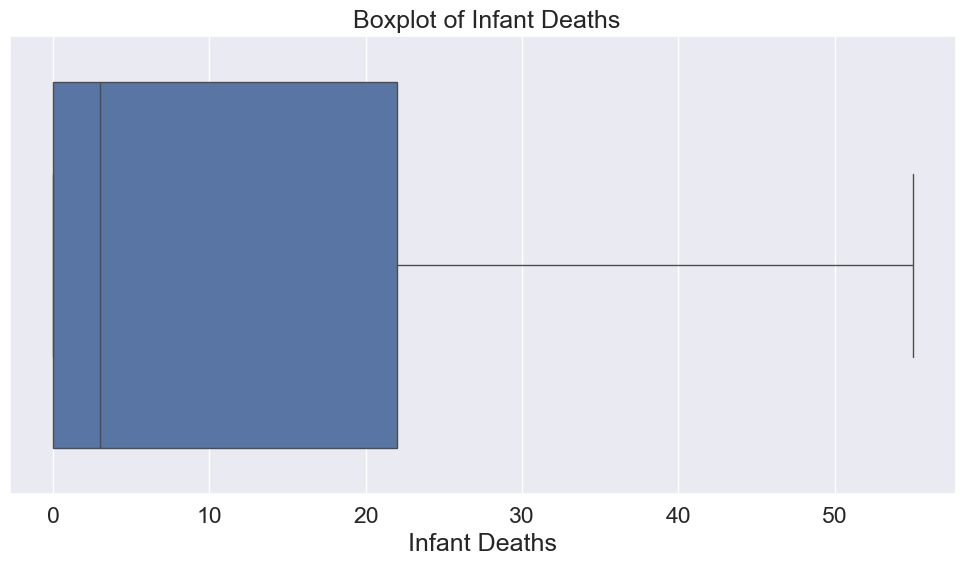

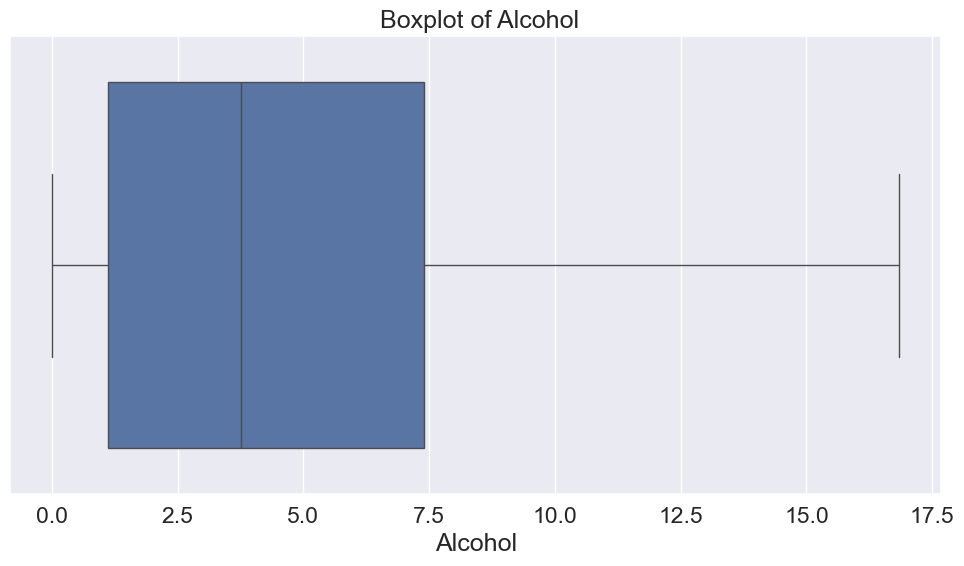

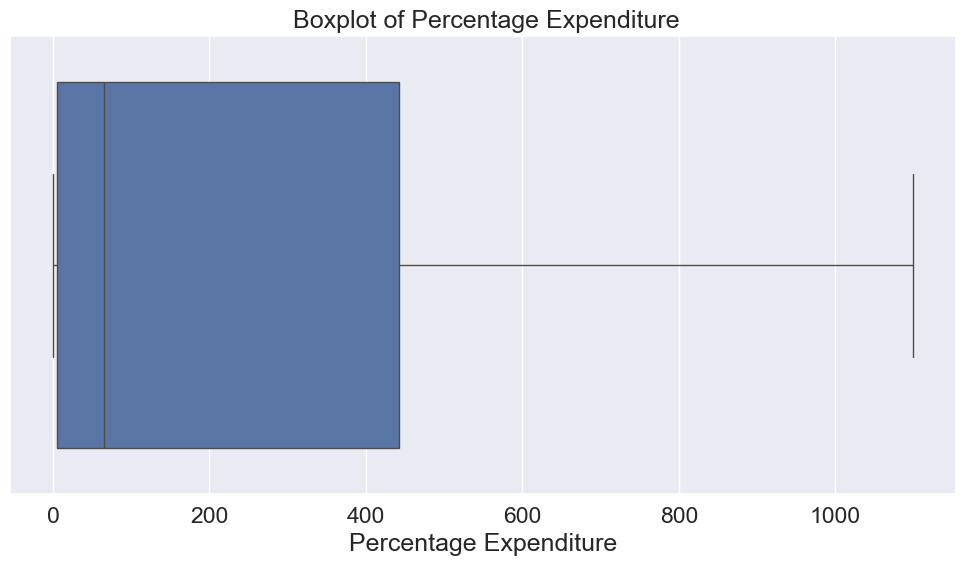

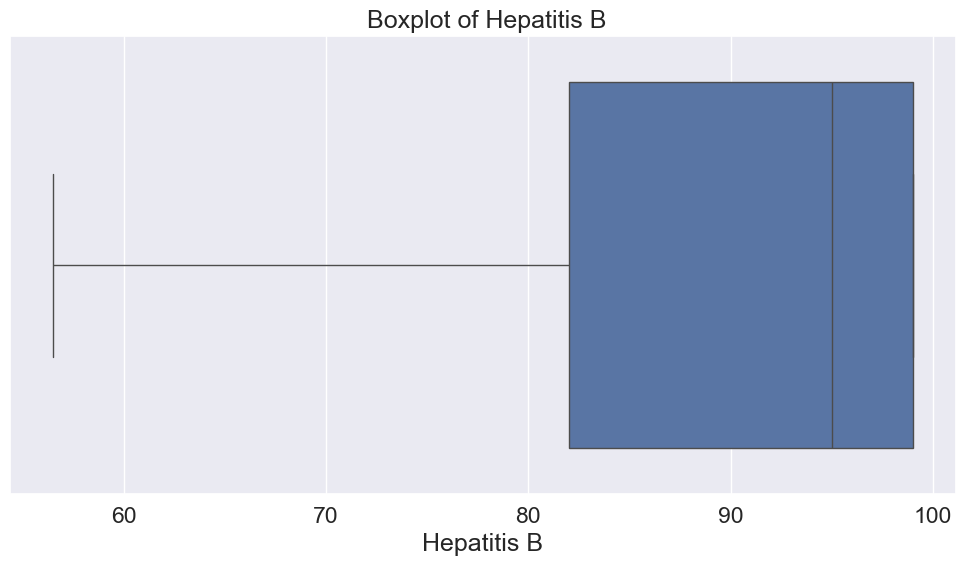

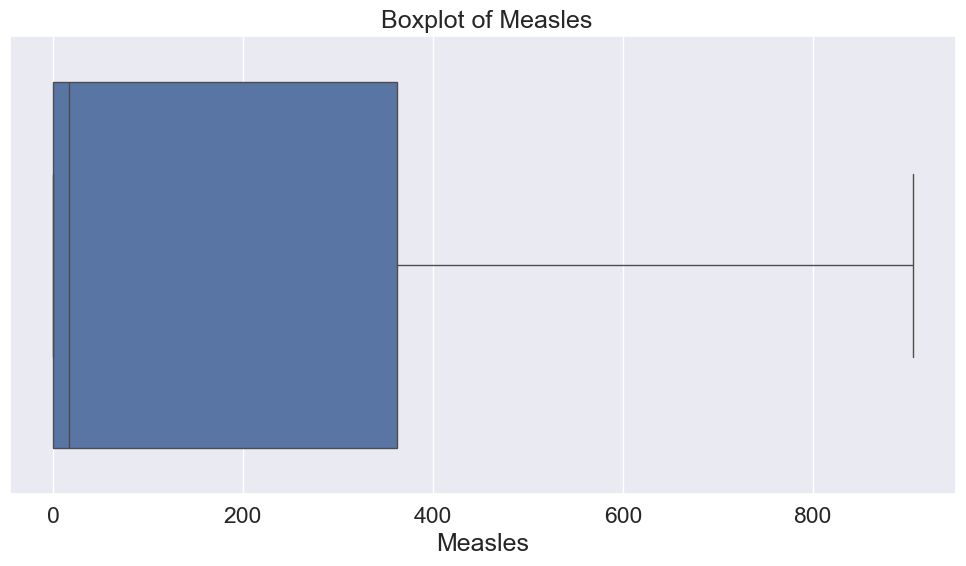

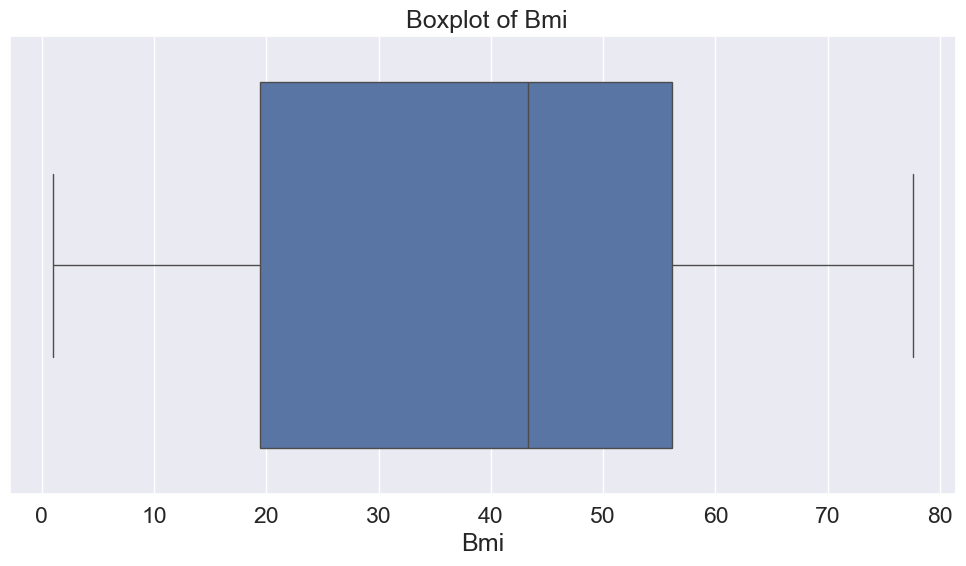

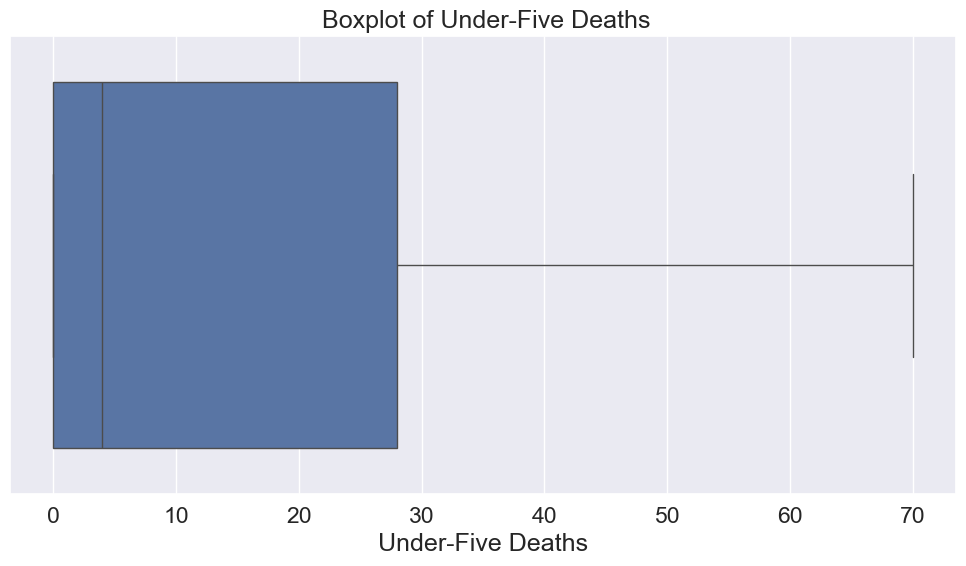

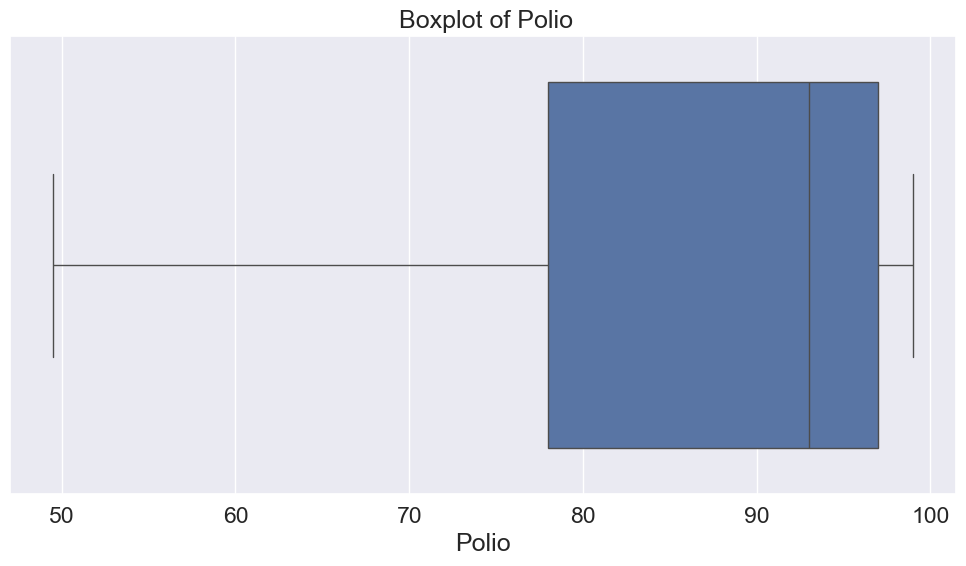

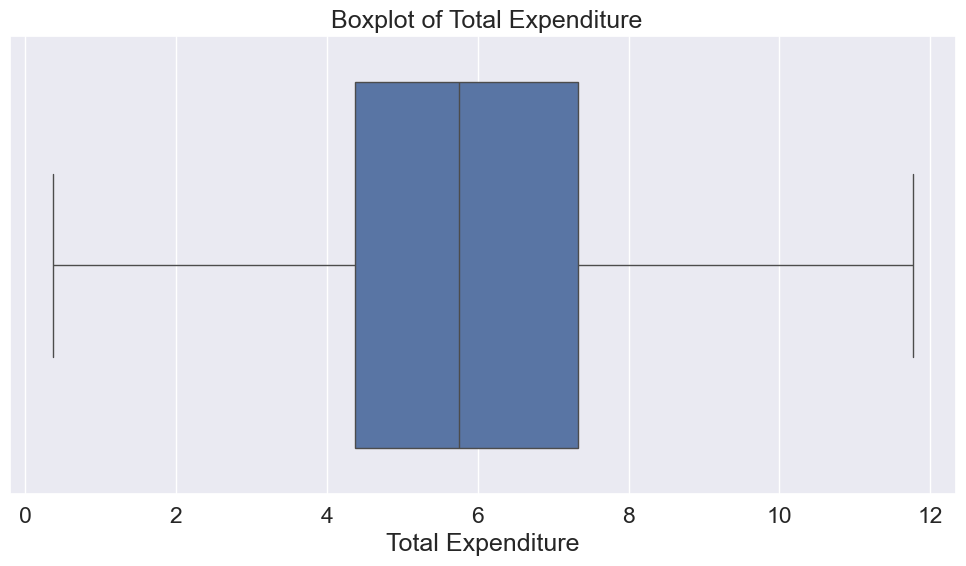

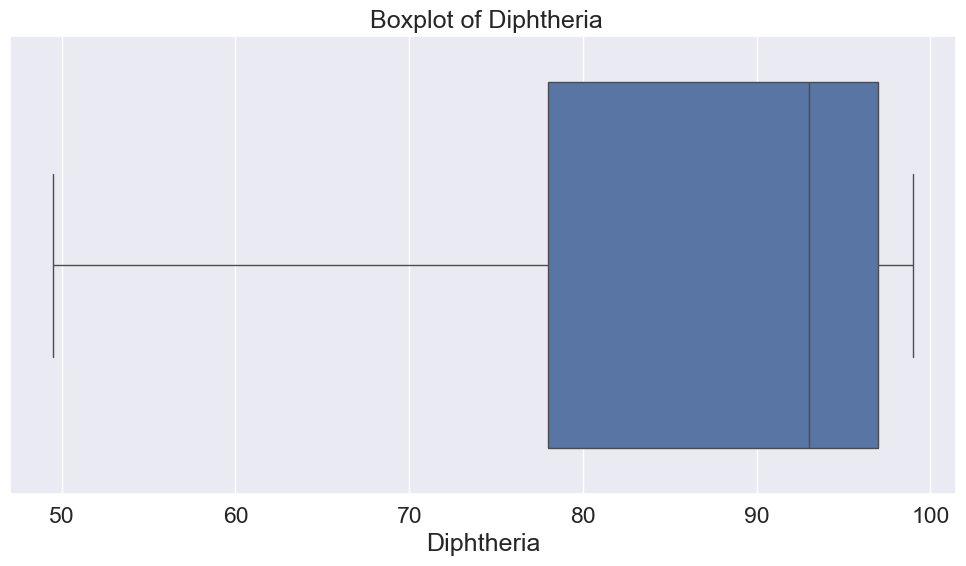

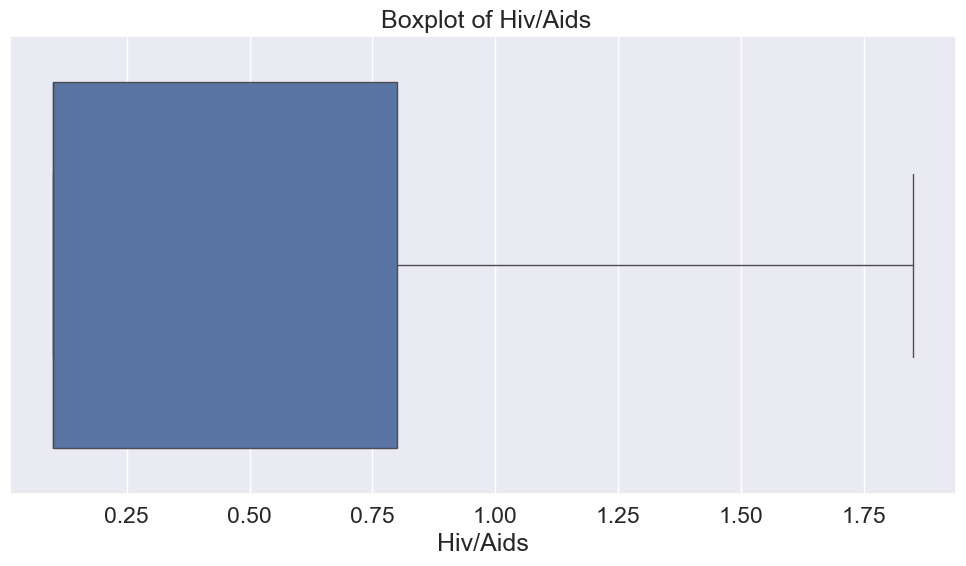

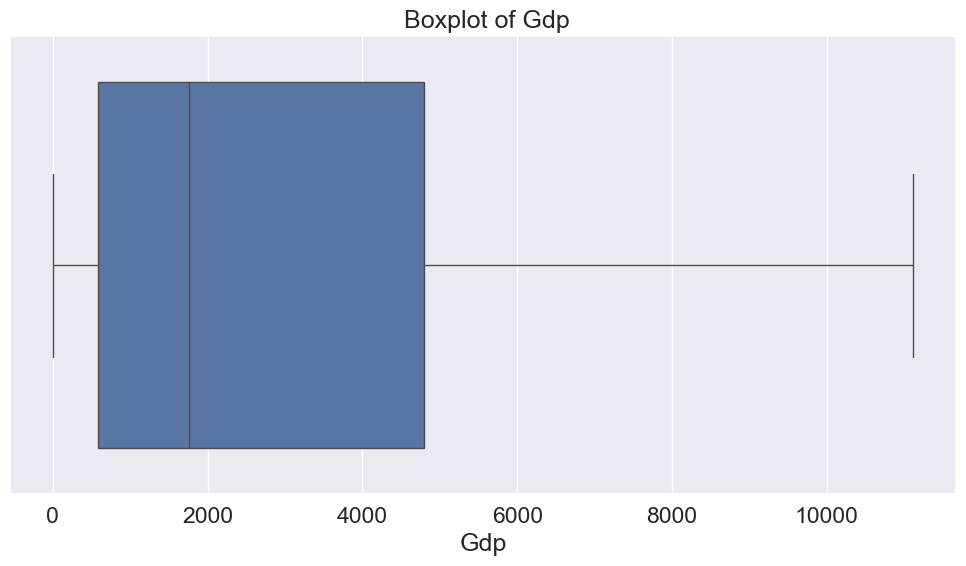

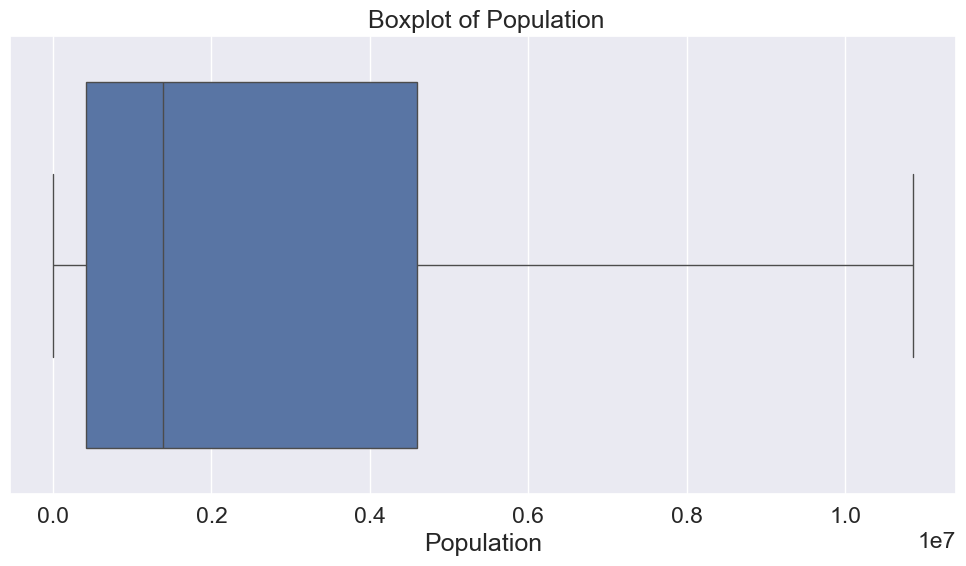

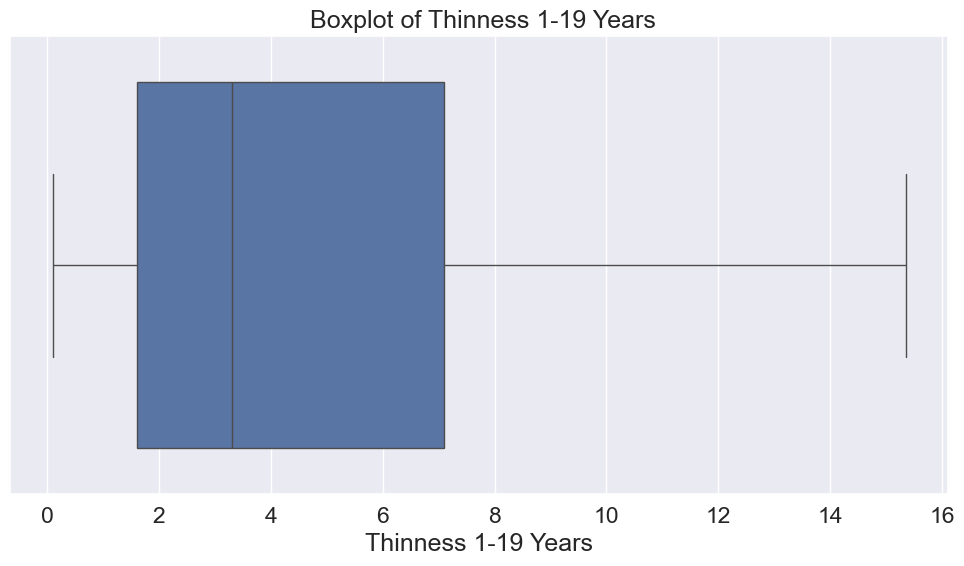

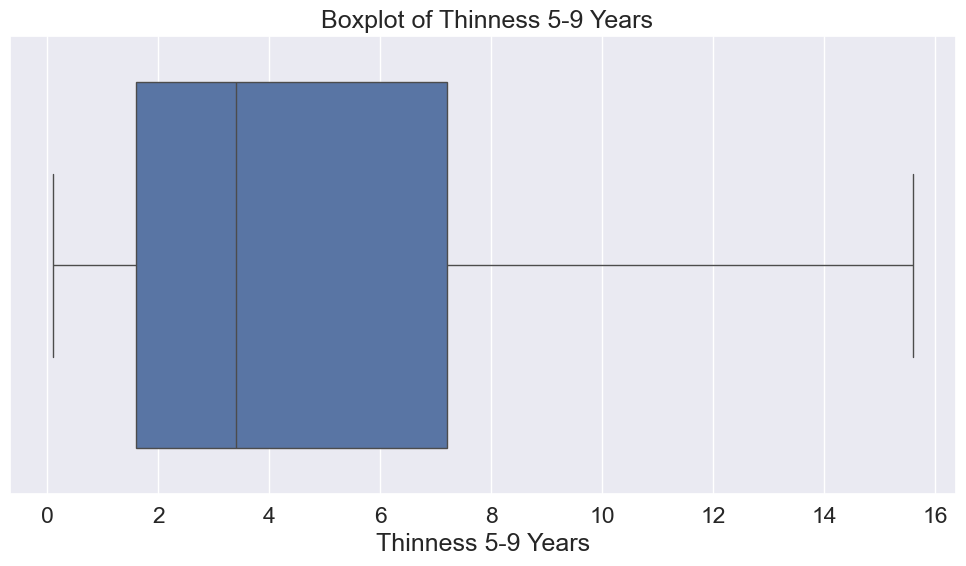

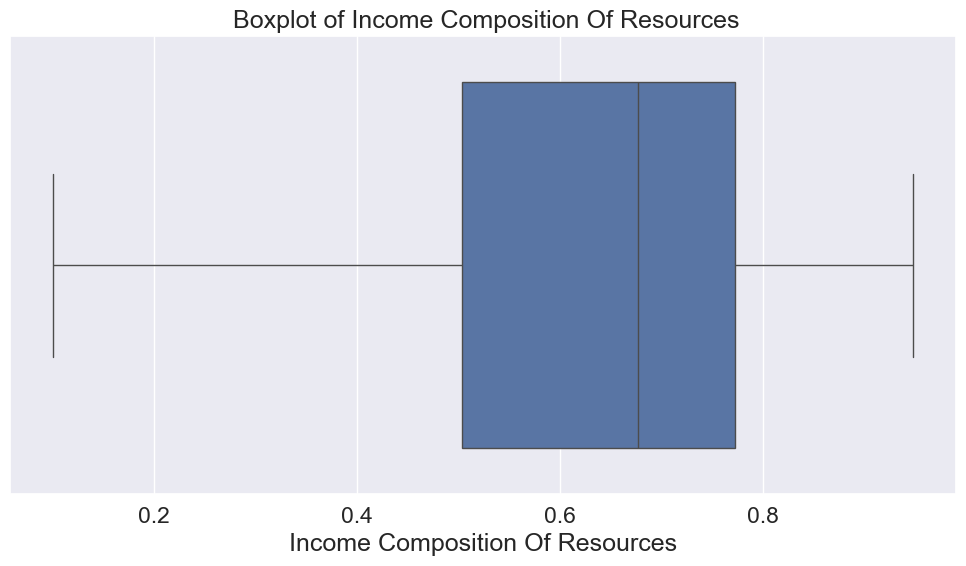

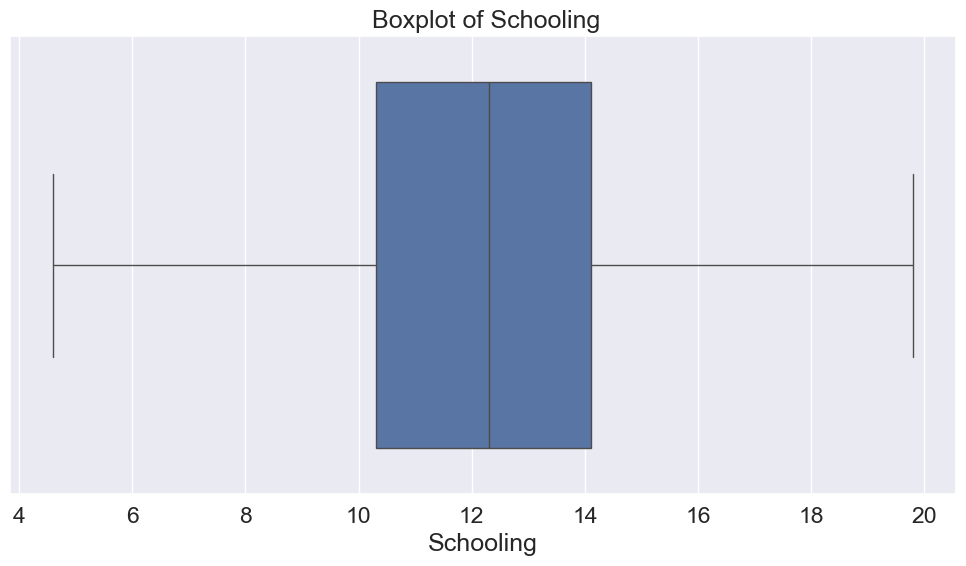

In [107]:
numerical_cols = df.select_dtypes(include = ["number"]).drop(columns = ["Life Expectancy"]).columns
for col in numerical_cols:
    plt.figure(figsize = (10,6))
    sns.boxplot(x = df_capped[col])
    plt.title(f" Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Clearly we can see that there is no outlier after treating it using Capping method

# Now we will see for the distribution of all the variables.
# And also check the skewness

In [108]:
numerical_cols = df_capped.select_dtypes(include = ['number']).drop(columns = ["Life Expectancy"]).columns

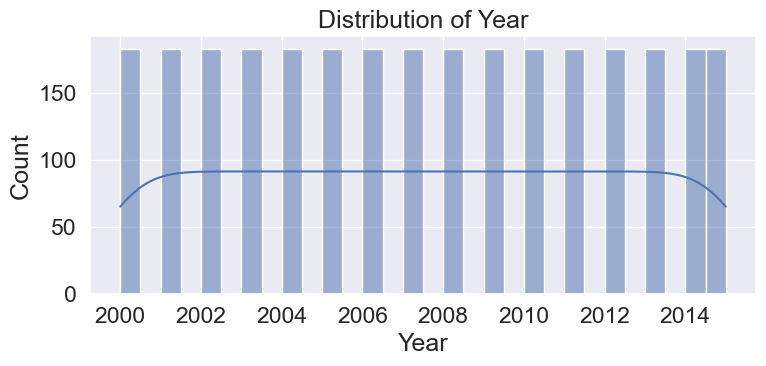

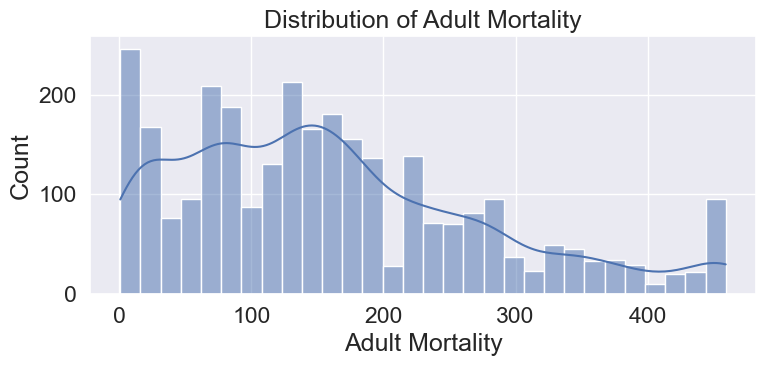

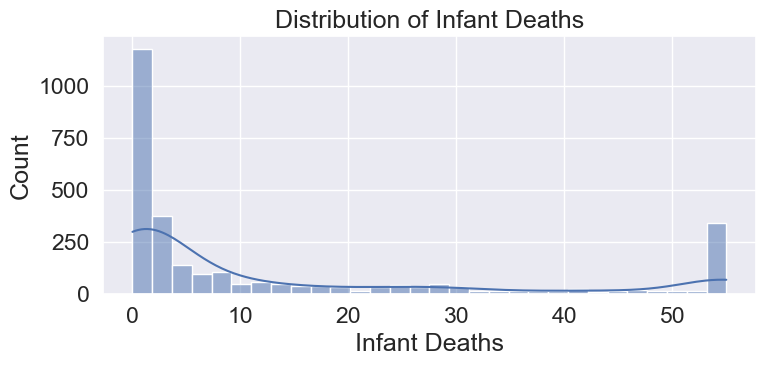

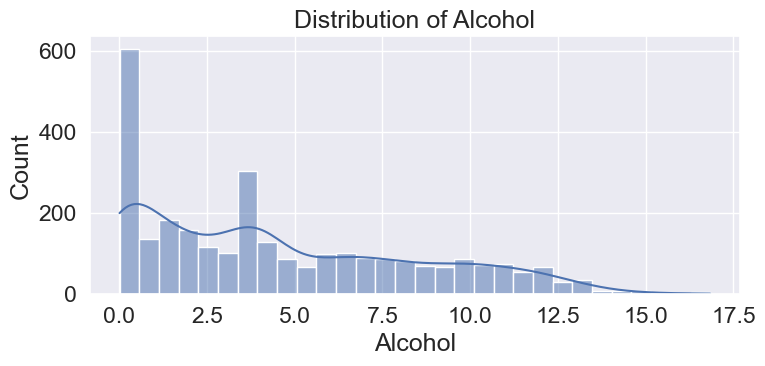

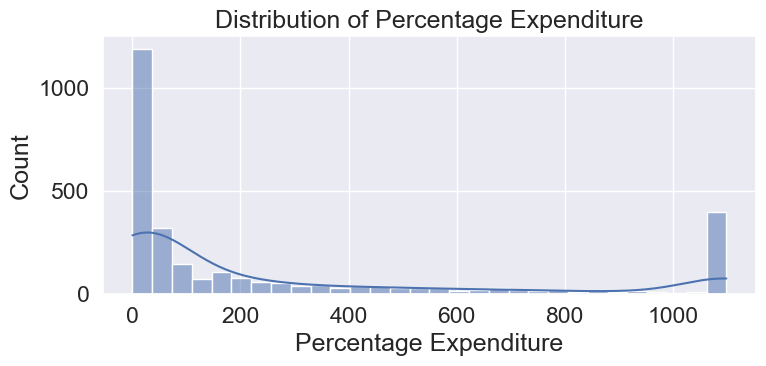

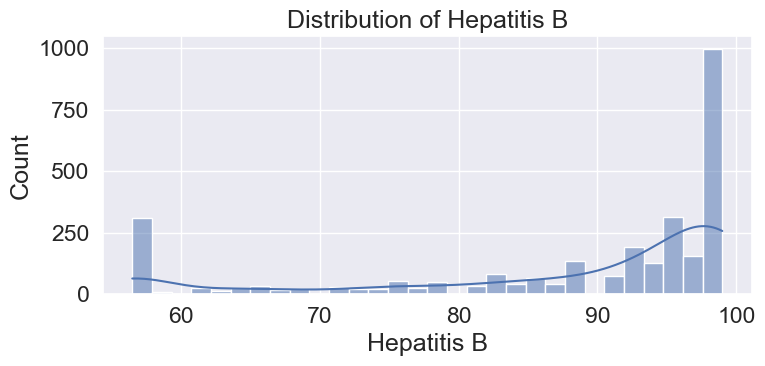

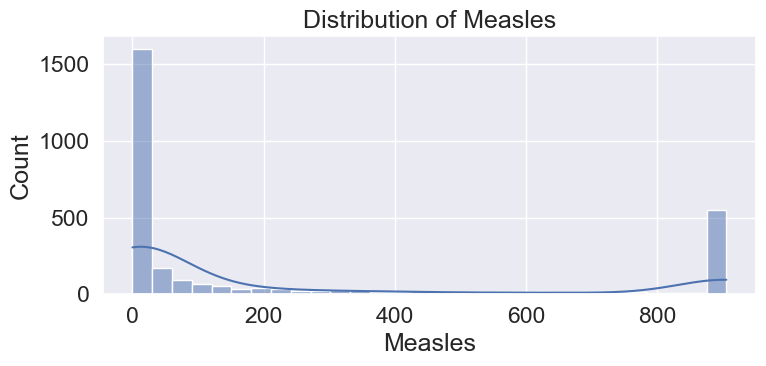

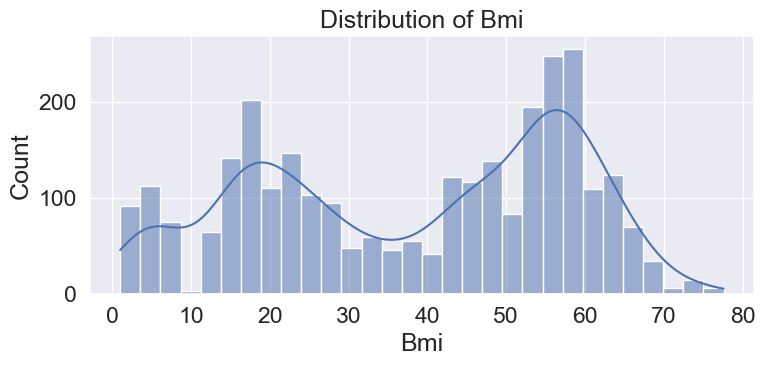

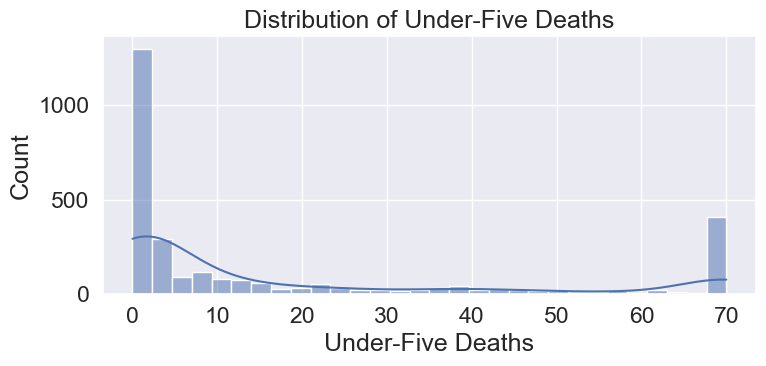

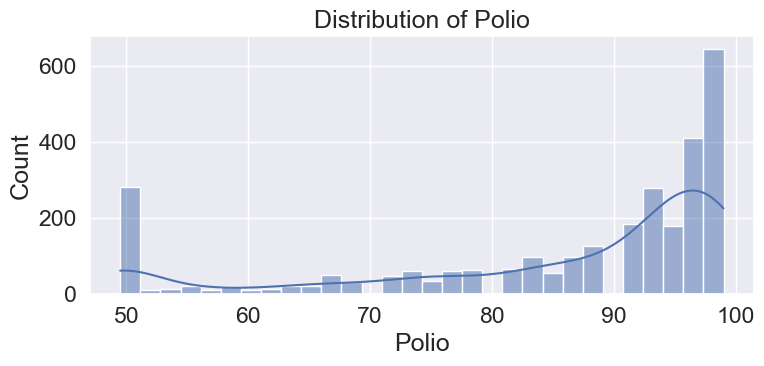

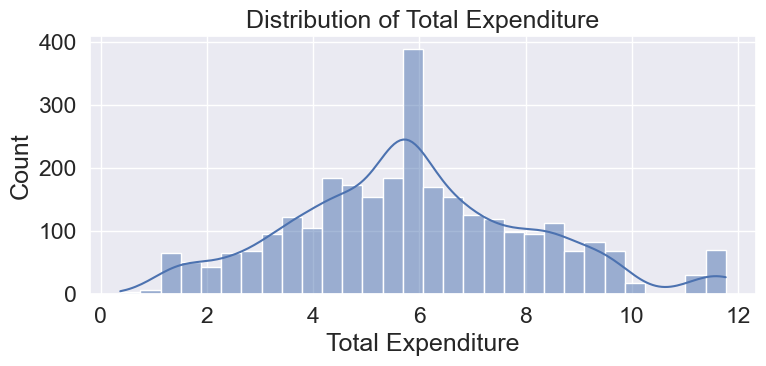

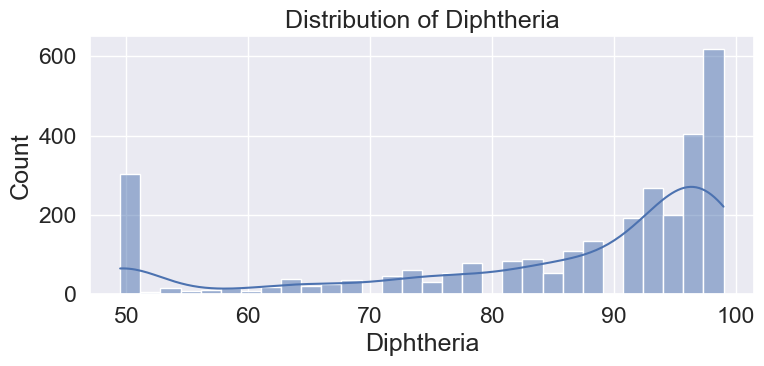

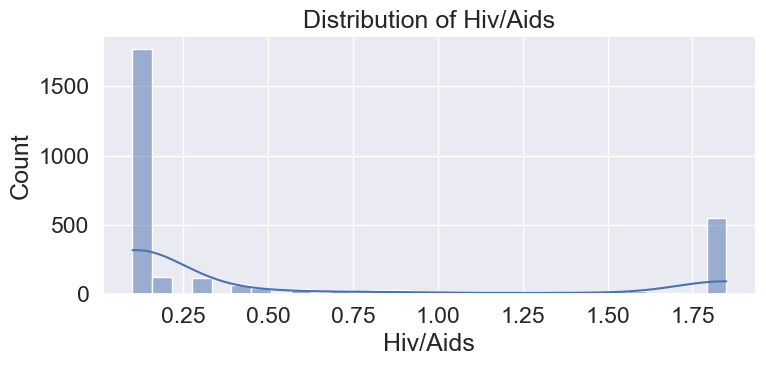

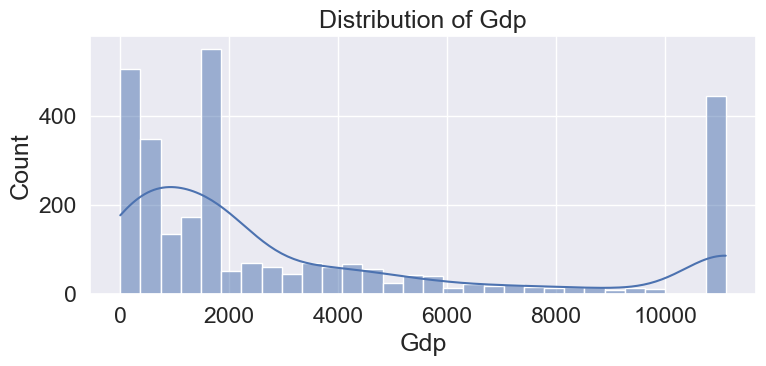

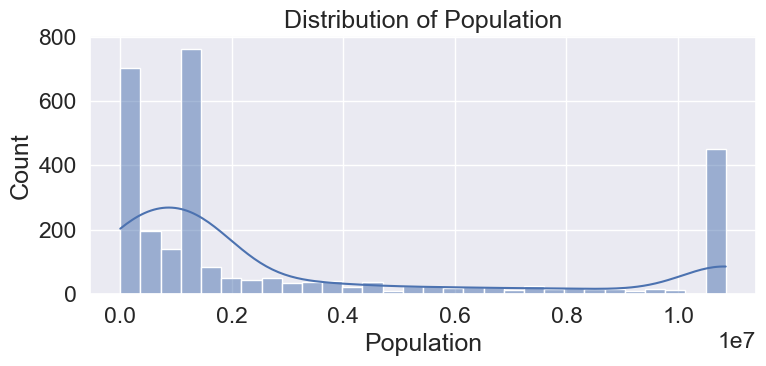

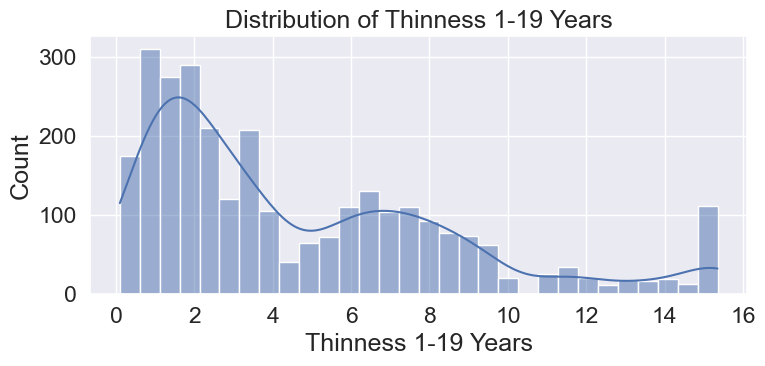

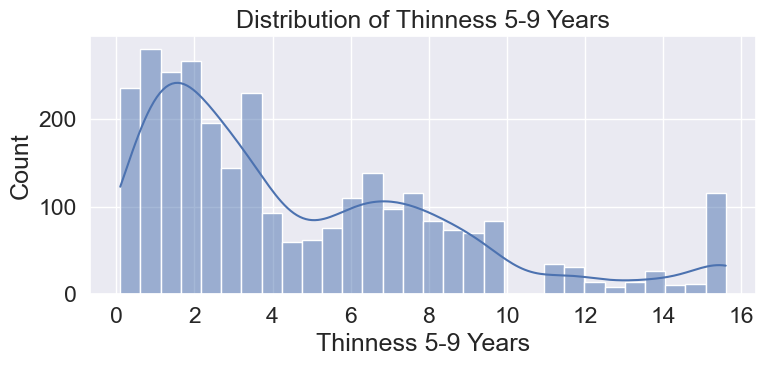

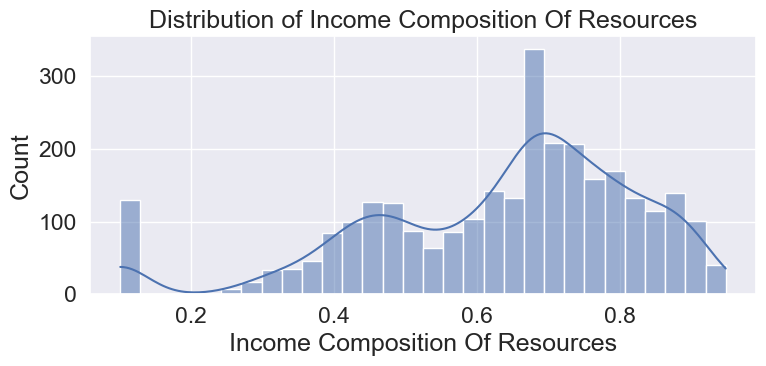

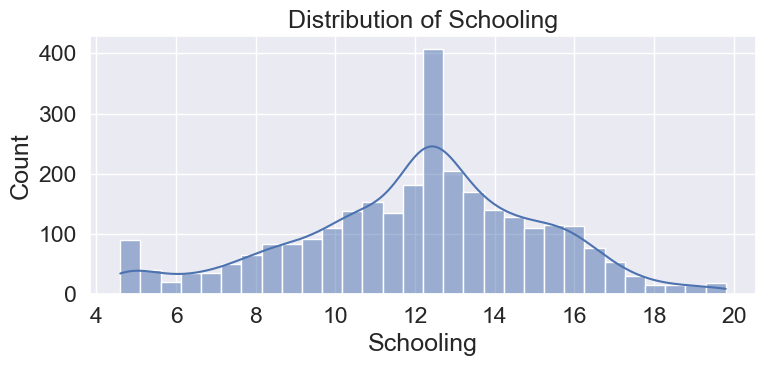

In [109]:
for feature in numerical_cols:
    plt.figure(figsize = (8,4))
    sns.histplot(df_capped[feature], kde = True, bins = 30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [110]:
Skewness_before = df_capped.select_dtypes(include =["number"]).skew()
print(Skewness_before)

Year                               0.000000
Life Expectancy                   -0.638605
Adult Mortality                    0.777243
Infant Deaths                      1.284006
Alcohol                            0.643809
Percentage Expenditure             1.243088
Hepatitis B                       -1.250056
Measles                            1.181978
Bmi                               -0.239842
Under-Five Deaths                  1.234535
Polio                             -1.235595
Total Expenditure                  0.282613
Diphtheria                        -1.254593
Hiv/Aids                           1.204141
Gdp                                1.155462
Population                         1.188389
Thinness 1-19 Years                1.086849
Thinness 5-9 Years                 1.103044
Income Composition Of Resources   -0.906568
Schooling                         -0.316263
dtype: float64


# We can clearly see that 
### We have to do transformation on the following -> 
1) Life Expectancy
2) Adult Mortality
3) Infant Deaths
4) Alcohol
5) Percentage Expenditure
6) Hepatitis B
7) Measles
8) Under-Five Deaths
9) Polio
10) Diphtheria
11) Hiv/Aids
12) Gdp
13) Population
14) Thinness  1-19 Years
15) Thinness 5-9 Years
16) Income Composition Of Resources

In [111]:
from scipy.stats import boxcox

In [112]:
After_Transformation_df = df_capped.copy()

Numerical_Cols = ["Adult Mortality","Infant Deaths", "Alcohol", "Percentage Expenditure", "Hepatitis B", 
                  "Measles", "Under-Five Deaths", "Polio", "Diphtheria", "Hiv/Aids", "Gdp", "Population", "Thinness 1-19 Years",
                  "Thinness 5-9 Years", "Income Composition Of Resources"]

for cols in Numerical_Cols:
    After_Transformation_df[cols], _ = boxcox(After_Transformation_df[cols] + 1)

In [113]:
Skewness_After = After_Transformation_df.select_dtypes(include = ["number"]).skew()
Skewness_After

Year                               0.000000
Life Expectancy                   -0.638605
Adult Mortality                   -0.120640
Infant Deaths                      0.124852
Alcohol                           -0.084721
Percentage Expenditure            -0.111917
Hepatitis B                       -0.604864
Measles                            0.082364
Bmi                               -0.239842
Under-Five Deaths                  0.112913
Polio                             -0.565132
Total Expenditure                  0.282613
Diphtheria                        -0.563162
Hiv/Aids                           0.779158
Gdp                               -0.071922
Population                        -0.119222
Thinness 1-19 Years                0.009367
Thinness 5-9 Years                 0.002726
Income Composition Of Resources   -0.123101
Schooling                         -0.316263
dtype: float64

# From the above we can clearly see that 
1) Hepatitis B
2) Polio
3) Diphtheria
4) Hiv/Aids
### We need to do further transformation to these variales since its skewness value is > 0.5

In [114]:
# After_Transformation_df['Hepatitis B'] = np.sqrt(After_Transformation_df['Hepatitis B'])
# After_Transformation_df['Polio'] = np.sqrt(After_Transformation_df['Polio'])
# After_Transformation_df['Diphtheria'] = np.sqrt(After_Transformation_df['Diphtheria'])
# After_Transformation_df['Hiv/Aids'] = np.sqrt(After_Transformation_df['Hiv/Aids'])

In [115]:
# New_skewness_after_transformation = After_Transformation_df.select_dtypes(include = ["number"]).skew()
# New_skewness_after_transformation

In [116]:
skew_comparison = pd.DataFrame({
    "Skewness Before": Skewness_before,
    "Skewness After": Skewness_After
})
skew_comparison

Skewness Before  Skewness After
Year                                    0.000000        0.000000
Life Expectancy                        -0.638605       -0.638605
Adult Mortality                         0.777243       -0.120640
Infant Deaths                           1.284006        0.124852
Alcohol                                 0.643809       -0.084721
Percentage Expenditure                  1.243088       -0.111917
Hepatitis B                            -1.250056       -0.604864
Measles                                 1.181978        0.082364
Bmi                                    -0.239842       -0.239842
Under-Five Deaths                       1.234535        0.112913
Polio                                  -1.235595       -0.565132
Total Expenditure                       0.282613        0.282613
Diphtheria                             -1.254593       -0.563162
Hiv/Aids                                1.204141        0.779158
Gdp                                     1.155462       -0.071922
Population                              1.188389       -0.119222
Thinness 1-19 Years                     1.086849        0.009367
Thinness 5-9 Years                      1.103044        0.002726
Income Composition Of Resources        -0.906568       -0.123101
Schooling                              -0.316263       -0.316263

In [117]:
categorical_df = df.select_dtypes(include = ["object"])
categorical_df.head(5)

Country      Status
0  Afghanistan  Developing
1  Afghanistan  Developing
2  Afghanistan  Developing
3  Afghanistan  Developing
4  Afghanistan  Developing

In [118]:
# One-hot encode "Country", "Status"

df_cat_encoded = pd.get_dummies(categorical_df , columns = ["Country", "Status"], drop_first = True, dtype = int)
df_cat_encoded.head(5)

Country_Albania  Country_Algeria  Country_Angola  \
0                0                0               0   
1                0                0               0   
2                0                0               0   
3                0                0               0   
4                0                0               0   

   Country_Antigua and Barbuda  Country_Argentina  Country_Armenia  \
0                            0                  0                0   
1                            0                  0                0   
2                            0                  0                0   
3                            0                  0                0   
4                            0                  0                0   

   Country_Australia  Country_Austria  Country_Azerbaijan  Country_Bahamas  \
0                  0                0                   0                0   
1                  0                0                   0                0   
2                  0                0                   0                0   
3                  0                0                   0                0   
4                  0                0                   0                0   

   Country_Bahrain  Country_Bangladesh  Country_Barbados  Country_Belarus  \
0                0                   0                 0                0   
1                0                   0                 0                0   
2                0                   0                 0                0   
3                0                   0                 0                0   
4                0                   0                 0                0   

   Country_Belgium  Country_Belize  Country_Benin  Country_Bhutan  \
0                0               0              0               0   
1                0               0              0               0   
2                0               0              0               0   
3                0               0              0               0   
4                0               0              0               0   

   Country_Bolivia (Plurinational State of)  Country_Bosnia and Herzegovina  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   

   Country_Botswana  Country_Brazil  Country_Brunei Darussalam  \
0                 0               0                          0   
1                 0               0                          0   
2                 0               0                          0   
3                 0               0                          0   
4                 0               0                          0   

   Country_Bulgaria  Country_Burkina Faso  Country_Burundi  \
0                 0                     0                0   
1                 0                     0                0   
2                 0                     0                0   
3                 0                     0                0   
4                 0                     0                0   

   Country_Cabo Verde  Country_Cambodia  Country_Cameroon  Country_Canada  \
0                   0                 0                 0               0   
1                   0                 0                 0               0   
2                   0                 0                 0               0   
3                   0                 0                 0               0   
4                   0                 0                 0               0   

   Country_Central African Republic  Country_Chad  Country_Chile  \
0                                 0             0              0   
1                                 0             0           

In [119]:
After_Transformation_df = After_Transformation_df.select_dtypes(include = ["number"])
After_Transformation_df.head(5)

Year  Life Expectancy  Adult Mortality  Infant Deaths   Alcohol  \
0  2015             65.0        26.075147       2.920834  0.009963   
1  2014             59.9        26.465659       2.920834  0.009963   
2  2013             59.9        26.319954       2.920834  0.009963   
3  2012             59.5        26.514035       2.920834  0.009963   
4  2011             59.2        26.658590       2.920834  0.009963   

   Percentage Expenditure   Hepatitis B   Measles   Bmi  Under-Five Deaths  \
0                5.333236  5.439365e+09  5.671612  19.1           3.188156   
1                5.380060  4.159090e+09  5.246866  18.6           3.188156   
2                5.373784  4.980782e+09  5.151214  18.1           3.188156   
3                5.473386  6.461612e+09  5.671612  17.6           3.188156   
4                2.324363  7.029368e+09  5.671612  17.2           3.188156   

          Polio  Total Expenditure    Diphtheria  Hiv/Aids        Gdp  \
0  2.195461e+07               8.16  8.004173e+07  0.082656  12.400637   
1  4.564601e+07               8.18  6.428136e+07  0.082656  12.560612   
2  6.215028e+07               8.13  7.448389e+07  0.082656  12.664442   
3  8.902302e+07               8.52  9.213586e+07  0.082656  12.865330   
4  9.535275e+07               7.87  9.869929e+07  0.082656   6.354814   

   Population  Thinness 1-19 Years  Thinness 5-9 Years  \
0  153.392322             2.641053            2.762519   
1   68.904449             2.641053            2.762519   
2  153.392322             2.641053            2.762519   
3  120.247094             2.641053            2.762519   
4  114.487693             2.641053            2.762519   

   Income Composition Of Resources  Schooling  
0                         0.894334       10.1  
1                         0.885495       10.0  
2                         0.867964        9.9  
3                         0.847761        9.8  
4                         0.822176        9.5

### Here we can clearly see that there are some columns which have high magnitude. 
### So we will adjust them using standard scaler 

In [120]:
scaler = StandardScaler()

# Columns to scale
columns_to_scale = ['Year', 'Adult Mortality', 'Percentage Expenditure', 'Hepatitis B', 'Bmi', 'Measles', 'Polio', 
                    'Infant Deaths', 'Total Expenditure', 'Diphtheria', 'Gdp', 'Population', 'Schooling', 'Under-Five Deaths']

# Fit and transform
After_Transformation_df[columns_to_scale] = scaler.fit_transform(After_Transformation_df[columns_to_scale])

In [121]:
# Combined transformed numerical and categorical data
df_final = pd.concat([After_Transformation_df, df_cat_encoded], axis = 1)

df_final.head()

Year  Life Expectancy  Adult Mortality  Infant Deaths   Alcohol  \
0  1.626978             65.0         0.917914       1.456806  0.009963   
1  1.410048             59.9         0.967111       1.456806  0.009963   
2  1.193118             59.9         0.948755       1.456806  0.009963   
3  0.976187             59.5         0.973205       1.456806  0.009963   
4  0.759257             59.2         0.991416       1.456806  0.009963   

   Percentage Expenditure  Hepatitis B   Measles       Bmi  Under-Five Deaths  \
0                0.059321    -1.601707  1.327610 -0.966625           1.429713   
1                0.072387    -1.663200  1.142228 -0.991809           1.429713   
2                0.070636    -1.623734  1.100481 -1.016993           1.429713   
3                0.098428    -1.552608  1.327610 -1.042177           1.429713   
4               -0.780262    -1.525338  1.327610 -1.062324           1.429713   

      Polio  Total Expenditure  Diphtheria  Hiv/Aids       Gdp  Population  \
0 -1.766006           0.994564   -1.463873  0.082656 -0.755388    1.493496   
1 -1.635142           1.003311   -1.548313  0.082656 -0.727865   -0.754694   
2 -1.543977           0.981443   -1.493651  0.082656 -0.710002    1.493496   
3 -1.395540           1.152016   -1.399076  0.082656 -0.675440    0.611514   
4 -1.360576           0.867727   -1.363911  0.082656 -1.795530    0.458259   

   Thinness 1-19 Years  Thinness 5-9 Years  Income Composition Of Resources  \
0             2.641053            2.762519                         0.894334   
1             2.641053            2.762519                         0.885495   
2             2.641053            2.762519                         0.867964   
3             2.641053            2.762519                         0.847761   
4             2.641053            2.762519                         0.822176   

   Schooling  Country_Albania  Country_Algeria  Country_Angola  \
0  -0.633843                0                0               0   
1  -0.666115                0                0               0   
2  -0.698387                0                0               0   
3  -0.730658                0                0               0   
4  -0.827474                0                0               0   

   Country_Antigua and Barbuda  Country_Argentina  Country_Armenia  \
0                            0                  0                0   
1                            0                  0                0   
2                            0                  0                0   
3                            0                  0                0   
4                            0                  0                0   

   Country_Australia  Country_Austria  Country_Azerbaijan  Country_Bahamas  \
0                  0                0                   0                0   
1                  0                0                   0                0   
2                  0                0                   0                0   
3                  0                0                   0                0   
4                  0                0                   0                0   

   Country_Bahrain  Country_Bangladesh  Country_Barbados  Country_Belarus  \
0                0                   0                 0                0   
1                0                   0                 0                0   
2                0                   0                 0                0   
3                0                   0                 0                0   
4                0                   0                 0                0   

   Country_Belgium  Country_Belize  Country_Benin  Country_Bhutan  \
0                0               0              0               0   
1                0               0              0               0   
2                0               0              0               0   
3                0               0              0               0   
4                0               0  

# Now the distributon of the variable looks good so now we can go for Training and Testing

In [122]:
x = df_final.drop('Life Expectancy', axis = 1)
y = df_final['Life Expectancy']

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [124]:
print(f" x_train shape : {x_train.shape}")
print(f" x_test shape : {x_test.shape}")
print(f" y_train shape : {y_train.shape}")
print(f" y_test shape : {y_test.shape}")

 x_train shape : (2342, 202)
 x_test shape : (586, 202)
 y_train shape : (2342,)
 y_test shape : (586,)


## Store performance metrices in the list

In [125]:
# Store the performance merics in the list

training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [126]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """

    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R2 score
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate the Adjusted R2 scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1-(1- train_r2/100) * (n_train - 1)/(n_train - p_train - 1))
    test_adj_r2 = 100 * (1-(1- test_r2/100) *  (n_test -1)/(n_train - p_train - 1))

    # Calculate RMSE score
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data R2 = {train_r2: .2f}%, Adjusted_r2 = {train_adj_r2:.2f}%, RMSE = {train_rmse: 4f}")
    print(f"Testing Data R2 = {test_r2:2f}%, Adjusted_r2 = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")   

# Linear Regression

## Simple Linear Regression

In [120]:
evaluate_model_performance(
    model = LinearRegression(),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)

LinearRegression Performance Metrics:
Training Data R2 =  96.20%, Adjusted_r2 = 95.84%, RMSE =  1.861901
Testing Data R2 = 93.297057%, Adjusted_r2 = 98.17%, RMSE = 2.4308



# I asked chat gpt about Adjusted R2 in testing:
If in your results:

Training data shows:

Adjusted R² < R² ✅ (This is correct and expected)

Testing data shows:

Adjusted R² > R² ❌ (This is not statistically valid)

⚠️ Here's what we can infer:
🔴 Adjusted R² on testing data is likely incorrect.
Adjusted R² is designed for training data only.
It penalizes the addition of unnecessary predictors to avoid overfitting during model development.

On test data, we don’t know the number of predictors' impact on the model fit in the same way, and we’re not fitting the model again — we’re just evaluating it.


🔍 Why This Happens:
Wrong formula: You might be using training values of n and p on test data — which doesn’t make sense because the model isn't being refit.

Adjusted R² is not defined for test performance: It assumes you’re building the model on that data, which you are not in the test phase.

| Dataset      | Use R²? | Use Adjusted R²? | Use RMSE? |
| ------------ | ------- | ---------------- | --------- |
| **Training** | ✅ Yes   | ✅ Yes            | ✅ Yes     |
| **Testing**  | ✅ Yes   | ❌ No             | ✅ Yes     |


# Ridge Regression

In [122]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)

Lasso Performance Metrics:
Training Data R2 =  80.73%, Adjusted_r2 = 78.91%, RMSE =  4.194707
Testing Data R2 = 79.386912%, Adjusted_r2 = 94.36%, RMSE = 4.2628



# Lasso Regression

In [123]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data R2 =  80.73%, Adjusted_r2 = 78.91%, RMSE =  4.194707
Testing Data R2 = 79.386912%, Adjusted_r2 = 94.36%, RMSE = 4.2628



# Elastic Net

In [124]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data R2 =  77.10%, Adjusted_r2 = 74.94%, RMSE =  4.572443
Testing Data R2 = 76.227543%, Adjusted_r2 = 93.50%, RMSE = 4.5778



# DecisionTree Regression

In [125]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data R2 =  100.00%, Adjusted_r2 = 100.00%, RMSE =  0.000000
Testing Data R2 = 91.517915%, Adjusted_r2 = 97.68%, RMSE = 2.7345



# Random Forest

In [126]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data R2 =  99.48%, Adjusted_r2 = 99.43%, RMSE =  0.687010
Testing Data R2 = 95.219063%, Adjusted_r2 = 98.69%, RMSE = 2.0529



# SVR(Support vector Regressor)

In [127]:
from sklearn.svm import SVR

In [128]:
evaluate_model_performance(
    model=SVR(kernel='rbf'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

SVR Performance Metrics:
Training Data R2 =  86.93%, Adjusted_r2 = 85.70%, RMSE =  3.454249
Testing Data R2 = 86.554780%, Adjusted_r2 = 96.32%, RMSE = 3.4427



# KNN (Kth Nearest Neighbour)

In [129]:
from sklearn.neighbors import KNeighborsRegressor

In [130]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data R2 =  94.59%, Adjusted_r2 = 94.08%, RMSE =  2.222661
Testing Data R2 = 90.024577%, Adjusted_r2 = 97.27%, RMSE = 2.9654



# Ensemble Learning Methods

# Voting Regressor

In [131]:
# Define the base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators = 100, random_state = 3)
model3 = KNeighborsRegressor()

In [132]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators = [('lr', model1), ('rf', model2), ('knn', model3)])

In [133]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data R2 =  98.04%, Adjusted_r2 = 97.86%, RMSE =  1.336083
Testing Data R2 = 94.708749%, Adjusted_r2 = 98.55%, RMSE = 2.1597



# Bagging Regressor

In [136]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [137]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=3)

In [138]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

In [139]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data R2 =  99.25%, Adjusted_r2 = 99.18%, RMSE =  0.827126
Testing Data R2 = 95.521212%, Adjusted_r2 = 98.78%, RMSE = 1.9870



# Ada Boosting

In [140]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data R2 =  90.42%, Adjusted_r2 = 89.52%, RMSE =  2.957240
Testing Data R2 = 88.296860%, Adjusted_r2 = 96.80%, RMSE = 3.2120



# GradientBoosting Regression

In [141]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data R2 =  95.71%, Adjusted_r2 = 95.30%, RMSE =  1.980019
Testing Data R2 = 92.993164%, Adjusted_r2 = 98.08%, RMSE = 2.4853



# XGB Regression

In [142]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data R2 =  99.56%, Adjusted_r2 = 99.52%, RMSE =  0.631634
Testing Data R2 = 95.422301%, Adjusted_r2 = 98.75%, RMSE = 2.0088



# CatBoost Regression

In [143]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data R2 =  98.77%, Adjusted_r2 = 98.65%, RMSE =  1.059718
Testing Data R2 = 95.421955%, Adjusted_r2 = 98.75%, RMSE = 2.0089



In [144]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "XGBoost",
    "CatBoost",
    "SVM",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor"
    ]

In [145]:
# Ensure all metric lists match the length of the models list
models = models[:14]  # or len(training_scores_r2) if you want to match the metrics

training_scores_r2 = training_scores_r2[:len(models)]
training_scores_adj_r2 = training_scores_adj_r2[:len(models)]
training_scores_rmse = training_scores_rmse[:len(models)]
testing_scores_r2 = testing_scores_r2[:len(models)]
testing_scores_adj_r2 = testing_scores_adj_r2[:len(models)]
testing_scores_rmse = testing_scores_rmse[:len(models)]

# Now create the DataFrame
df_model = pd.DataFrame({
    "Algorithms": models,
    "Training Score R2": training_scores_r2,
    "Training Score Adjusted R2": training_scores_adj_r2,
    "Training Score RMSE": training_scores_rmse,
    "Testing Score R2": testing_scores_r2,
    "Testing Score Adjusted R2": testing_scores_adj_r2,
    "Testing Score RMSE": testing_scores_rmse,
})

# Sort by Testing Score R2
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort


Algorithms  Training Score R2  Training Score Adjusted R2  \
9            CatBoost          99.250623                   99.179854   
12   Voting Regressor          99.562993                   99.521723   
13  Bagging Regressor          98.769906                   98.653740   
5       Random Forest          99.483009                   99.434186   
8             XGBoost          98.044649                   97.859992   
0   Linear Regression          96.202735                   95.844134   
11                KNN          95.705660                   95.300117   
4       Decision Tree         100.000000                  100.000000   
7      Gradient Boost          94.588670                   94.077642   
10                SVM          90.420766                   89.516136   
6           Ada Boost          86.930324                   85.696068   
1               Ridge          80.726495                   78.906369   
2               Lasso          80.726495                   78.906369   
3          ElasticNet          77.099013                   74.936321   

    Training Score RMSE  Testing Score R2  Testing Score Adjusted R2  \
9          8.271257e-01         95.521212                  98.775086   
12         6.316342e-01         95.422301                  98.748035   
13         1.059718e+00         95.421955                  98.747940   
5          6.870096e-01         95.219063                  98.692451   
8          1.336083e+00         94.708749                  98.552884   
0          1.861901e+00         93.297057                  98.166797   
11         1.980019e+00         92.993164                  98.083685   
4          2.543065e-16         91.517915                  97.680215   
7          2.222661e+00         90.024577                  97.271799   
10         2.957240e+00         88.296860                  96.799282   
6          3.454249e+00         86.554780                  96.322836   
1          4.194707e+00         79.386912                  94.362479   
2          4.194707e+00         79.386912                  94.362479   
3          4.572443e+00         76.227543                  93.498416   

    Testing Score RMSE  
9             1.987007  
12            2.008828  
13            2.008904  
5             2.052938  
8             2.159725  
0             2.430815  
11            2.485308  
4             2.734453  
7             2.965411  
10            3.211962  
6             3.442732  
1             4.262759  
2             4.262759  
3             4.577794

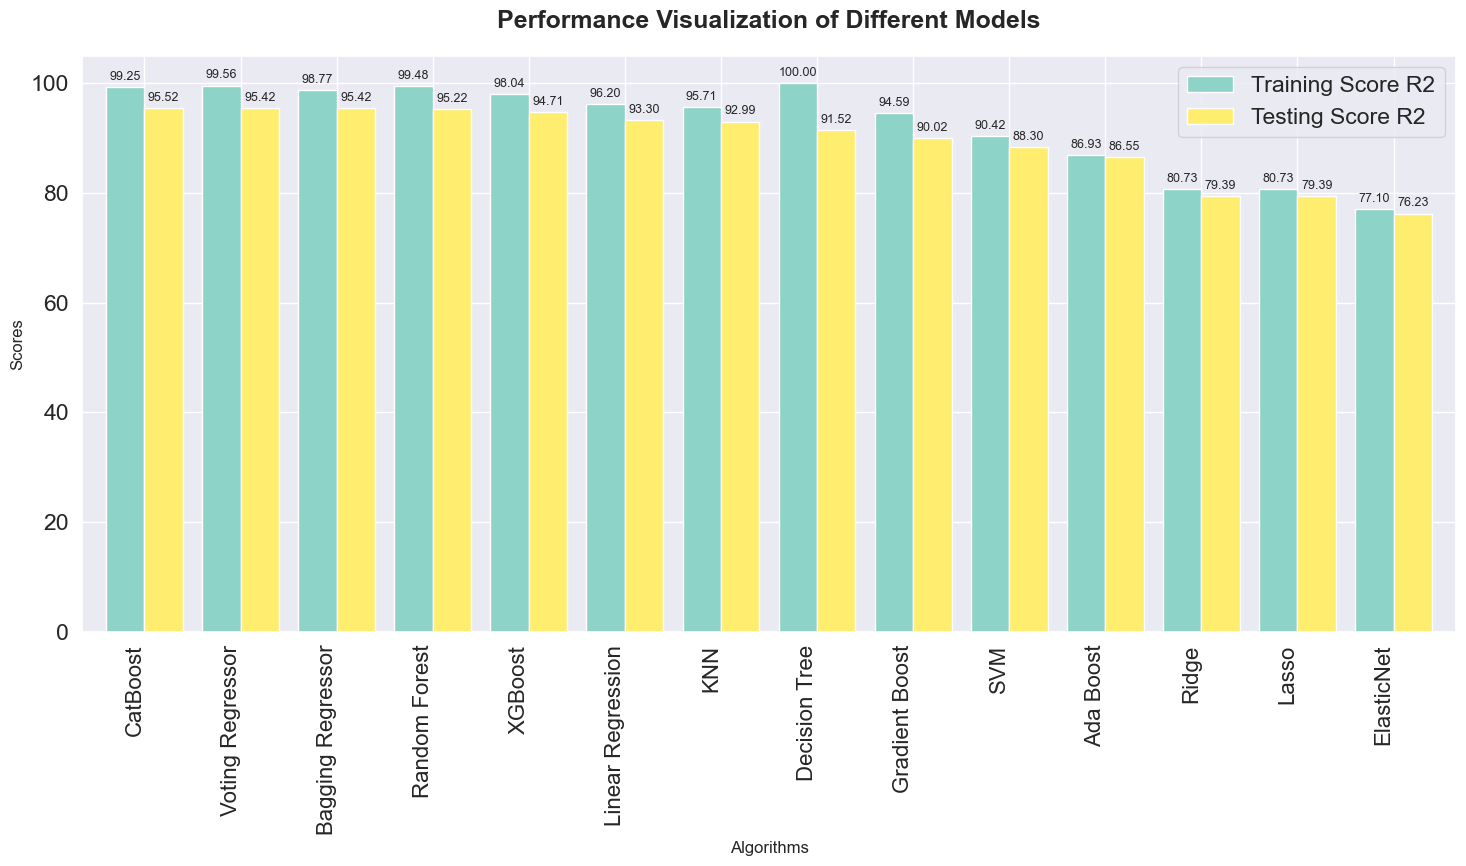

In [147]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

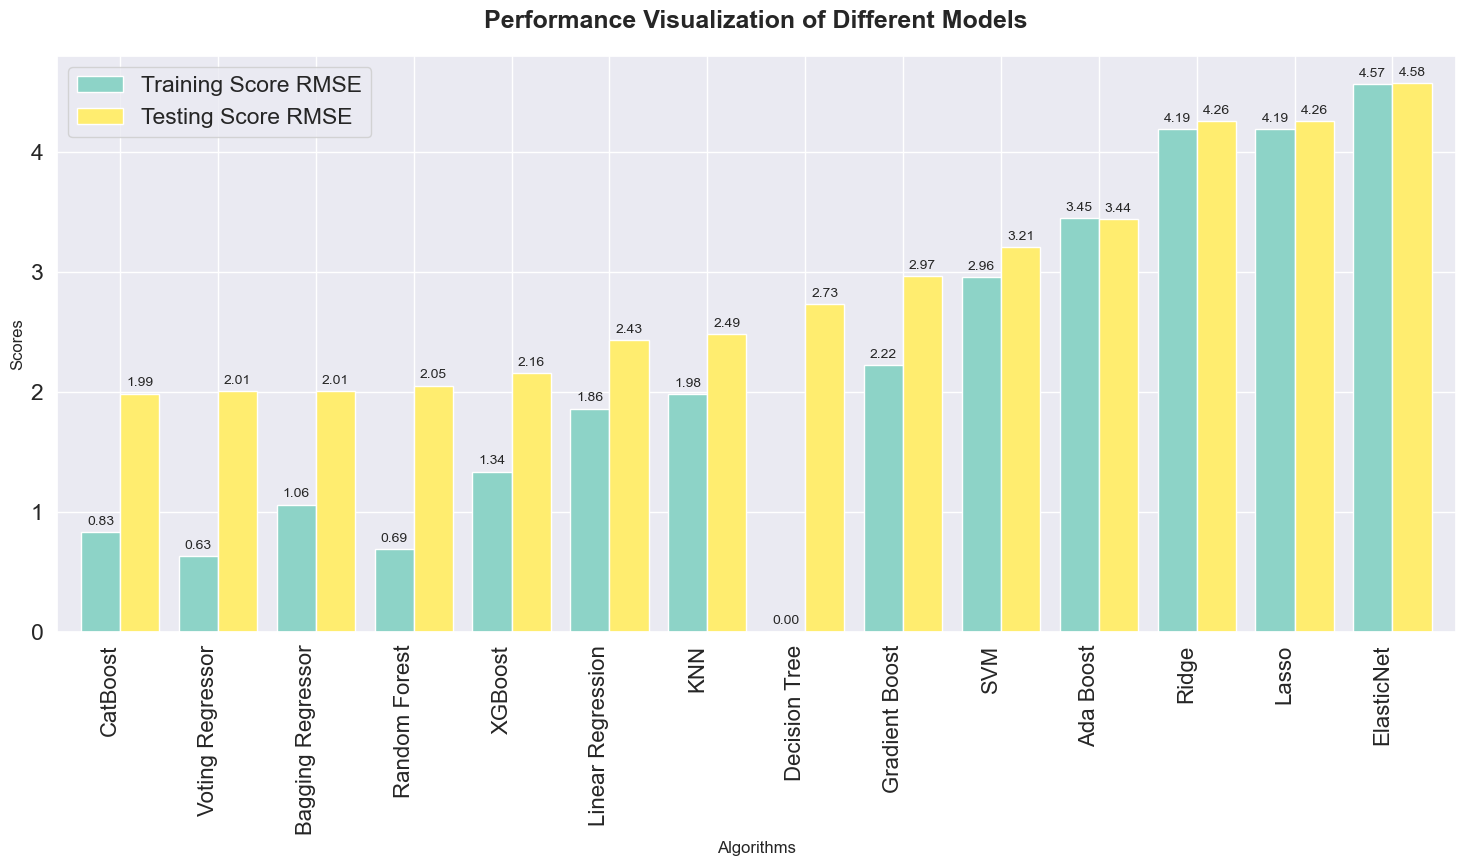

In [148]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

# Based on the graph we should go with CatBoost 
# But let's see what results we get after hyper parameter tuning

# Using Hyper Parameter Tuning

In [130]:
# Define features and target
x = df_final.drop('Life Expectancy', axis = 1)
y = df_final['Life Expectancy']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [131]:
print(f" x_train shape : {x_train.shape}")
print(f" x_test shape : {x_test.shape}")
print(f" y_train shape : {y_train.shape}")
print(f" y_test shape : {y_test.shape}")

 x_train shape : (2342, 202)
 x_test shape : (586, 202)
 y_train shape : (2342,)
 y_test shape : (586,)


In [132]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [133]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test,score_append = False):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    if score_append == True:
        # Append scores to respective lists
        training_scores_r2.append(train_r2)
        training_scores_adj_r2.append(train_adj_r2)
        training_scores_rmse.append(train_rmse)
        testing_scores_r2.append(test_r2)
        testing_scores_adj_r2.append(test_adj_r2) 
        testing_scores_rmse.append(test_rmse) 
    else:
        pass
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

# Linear Regression

In [153]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

LinearRegression Performance Metrics:
Training Data: R² = 96.20%, Adjusted R² = 95.84%, RMSE = 1.8619
Testing Data : R² = 93.30%, Adjusted R² = 89.76%, RMSE = 2.4308



# Ridge Regression

In [154]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize the Ridge regression model
ridge = Ridge()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],           # Regularization strength
    'fit_intercept': [True, False],                   # Include or exclude the intercept
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],  # Solver options
    'tol': [1e-4, 1e-3, 1e-2],                        # Tolerance for convergence
    'positive': [True, False]                         # Constrain coefficients to be positive
}
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    cv=5,                              # Number of cross-validation folds
    verbose=2,                         # Verbosity level
    n_jobs=-1                          # Use all available cores for parallel processing
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'positive': False, 'solver': 'auto', 'tol': 0.0001}
Best score (negative MSE): -4.354636251864088
Test MSE: 5.891740229579335


# Best Parameter

In [155]:
# Create the Ridge Regression model
ridge_regressor = Ridge(
    alpha=0.1,                   # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    tol=0.0001,                  # Tolerance for stopping criteria
    solver='auto',              # Solver to use ('auto', 'lsqr', 'saga', etc.)
    positive=False,
    random_state=3,           # Random state for reproducibility
)

In [156]:
evaluate_model_performance(
    model=ridge_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

Ridge Performance Metrics:
Training Data: R² = 96.15%, Adjusted R² = 95.78%, RMSE = 1.8759
Testing Data : R² = 93.32%, Adjusted R² = 89.79%, RMSE = 2.4273



# Lasso Regression

In [157]:
# Initialize the Ridge regression model
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 2000],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    cv=5,                              # Number of cross-validation folds
    verbose=2,                         # Verbosity level
    n_jobs=-1                          # Use all available cores for parallel processing
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'alpha': 0.01, 'max_iter': 1000, 'selection': 'random', 'tol': 0.001}
Best score (negative MSE): -8.016431752164667
Test MSE: 9.870218198777863


# Best Parameter

In [158]:
# Create the Lasso Regression model
lasso_regressor = Lasso(
    alpha=0.01,                 # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.001,                 # Tolerance for stopping criteria
    selection='random',
    random_state=3,            # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [159]:
evaluate_model_performance(
    model=lasso_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

Lasso Performance Metrics:
Training Data: R² = 92.29%, Adjusted R² = 91.57%, RMSE = 2.6523
Testing Data : R² = 88.82%, Adjusted R² = 82.92%, RMSE = 3.1396



# Elastic Net

In [160]:
# Define the model
elastic_net = ElasticNet()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'max_iter': [100, 200, 500],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}
# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=elastic_net, 
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=2,
    n_jobs=-1)
# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
Best parameters: {'alpha': 0.01, 'l1_ratio': 1.0, 'max_iter': 200, 'selection': 'random', 'tol': 0.001}
Best score (negative MSE): -8.016676003532295
Test MSE: 9.870423946752034


# Best Parameter

In [161]:
# Create the ElasticNet Regression model
elasticnet_regressor = ElasticNet(
    alpha= 0.01,                  # Regularization strength
    l1_ratio= 1,               # The balance between Lasso (L1) and Ridge (L2) regularization (0 is Ridge, 1 is Lasso)
    fit_intercept=True,         # Whether to calculate the intercept (bias) term  **************************************
    selection= 'random',
    max_iter= 200,              # Maximum number of iterations for the solver
    tol=0.001,                 # Tolerance for stopping criteria
    random_state=3,          # Random state for reproducibility
)

In [162]:
evaluate_model_performance(
    model=elasticnet_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

ElasticNet Performance Metrics:
Training Data: R² = 92.29%, Adjusted R² = 91.57%, RMSE = 2.6523
Testing Data : R² = 88.82%, Adjusted R² = 82.92%, RMSE = 3.1396



# Decision Tree 

In [164]:
# Define the model
decision_tree = DecisionTreeRegressor(random_state=3)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 50],
    'ccp_alpha': [0.01, 0.1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree, 
    param_grid=param_grid,      
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=2,
    n_jobs=-1)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 10, 'min_samples_split': 2}
Test RMSE: 2.9771914756180764


# Best Parameter

In [165]:
# Create the DecisionTree Regressor model
decision_tree_regressor = DecisionTreeRegressor(
    criterion = 'squared_error',    # Updated to 'squared_error' for mean squared error
    splitter ='best',              # Strategy used to split at each node
    max_depth = 10,                 # Maximum depth of the tree
    min_samples_split = 2,          # Minimum number of samples required to split an internal node
    min_samples_leaf = 10,           # Minimum number of samples required to be at a leaf node
    max_features = None,            # The number of features to consider when looking for the best split
    random_state = 3,              # Controls the randomness for reproducibility
    max_leaf_nodes = 50,            # Grow a tree with a maximum number of leaf nodes
    ccp_alpha = 0.01
)

In [166]:
evaluate_model_performance(
    model=decision_tree_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 94.35%, Adjusted R² = 93.81%, RMSE = 2.2717
Testing Data : R² = 89.95%, Adjusted R² = 84.64%, RMSE = 2.9772



# Random Forest

In [167]:
# Initialize the model
random_forest_regressor = RandomForestRegressor(random_state=3, n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees
    'max_depth': [None, 5, 10, 15],       # Tree depth
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],        # Minimum samples at a leaf
    'max_features': ['sqrt', 'log2'],     # Features considered for best split
}


# Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for mean squared error
    cv=3,                             # 3-fold cross-validation
    verbose=2,                        # Print detailed logs
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test MSE: 4.98


# Best Parameter

In [168]:
# Create the RandomForest Regressor model
random_forest_regressor = RandomForestRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    n_estimators=150,             # Number of trees in the forest
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features='sqrt',          # Use square root of features for the best split
    random_state=3,              # Controls the randomness for reproducibility
    n_jobs=-1,                    # Use all available cores for parallel processing
    max_samples=None,             # If bootstrap=True, the number of samples to draw from X to train each base estimator
)

In [169]:
evaluate_model_performance(
    model=random_forest_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.38%, Adjusted R² = 99.32%, RMSE = 0.7528
Testing Data : R² = 94.35%, Adjusted R² = 91.38%, RMSE = 2.2310



# Support Vector Regressor

In [170]:
# Initialize the model
svr_model = SVR()

# Define the parameter grid
param_grid = {
    'kernel': ['rbf', 'linear'],             # Kernel type
    'C': [0.1, 1, 10],                       # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5],              # Epsilon in the epsilon-SVR model
    'gamma': ['scale', 'auto']              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
}

# Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for mean squared error
    cv=3,                              # 3-fold cross-validation
    verbose=2,                         # Print detailed logs
    n_jobs=-1                          # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Test MSE: 6.31


# Best Parameter

In [171]:
# Create the SVR model with best-found hyperparameters
svr_best = SVR(
    kernel='linear',
    C=10,
    epsilon=0.5,
    gamma='scale'
    
)

In [172]:
# Custom evaluation function call
evaluate_model_performance(
    model=svr_best,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append=True
)

SVR Performance Metrics:
Training Data: R² = 95.63%, Adjusted R² = 95.22%, RMSE = 1.9974
Testing Data : R² = 92.84%, Adjusted R² = 89.07%, RMSE = 2.5120



# KNearest Neighbour

In [173]:
# Define the KNN regressor
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),                 # Number of neighbors
    'weights': ['uniform', 'distance'],          # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2, 3]                              # Power parameter for Minkowski
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Test MSE: 6.23


# Best Parameter

In [174]:
# Create the KNeighbors Regressor model
knn_regressor = KNeighborsRegressor(
    n_neighbors=2,               # Number of neighbors to use
    weights='distance',           # Weight function: 'uniform' or 'distance'
    metric='manhattan',          # The distance metric: 'minkowski', 'euclidean', etc.
    p=1,                         # Power parameter for the Minkowski metric (2 for Euclidean distance)
    n_jobs=-1                    # Use all available cores for parallel processing
)


In [175]:
evaluate_model_performance(
    model=knn_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 92.93%, Adjusted R² = 89.20%, RMSE = 2.4966



# Ensemble Learning methods

# Voting Regressor

In [177]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(
        criterion='squared_error',    
        n_estimators=150,             
        max_depth=None,              
        min_samples_split=2,          
        min_samples_leaf=1,          
        max_features='sqrt',          
        random_state=3,              
        n_jobs=-1,                   
        max_samples=None,    
        )
model3 = KNeighborsRegressor(
        n_neighbors=2,             
        weights='distance',         
        metric='manhattan',
        p=1,                  
        n_jobs=-1         
        )

In [178]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [179]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

VotingRegressor Performance Metrics:
Training Data: R² = 99.28%, Adjusted R² = 99.22%, RMSE = 0.8081
Testing Data : R² = 94.88%, Adjusted R² = 92.18%, RMSE = 2.1250



# Bagging Regressor

In [180]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(
    criterion = 'squared_error',    # Updated to 'squared_error' for mean squared error
    splitter ='best',              # Strategy used to split at each node
    max_depth = 10,                 # Maximum depth of the tree
    min_samples_split = 2,          # Minimum number of samples required to split an internal node
    min_samples_leaf = 10,           # Minimum number of samples required to be at a leaf node
    max_features = None,            # The number of features to consider when looking for the best split
    random_state = 3,              # Controls the randomness for reproducibility
    max_leaf_nodes = 50,            # Grow a tree with a maximum number of leaf nodes
    ccp_alpha = 0.01
    )

In [181]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor, # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=3,
    n_jobs=-1                 # Use all available cores
)

In [182]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

BaggingRegressor Performance Metrics:
Training Data: R² = 95.95%, Adjusted R² = 95.57%, RMSE = 1.9229
Testing Data : R² = 93.43%, Adjusted R² = 89.96%, RMSE = 2.4067



# Ada Boosting

In [183]:
# Define base estimator
base_estimator = DecisionTreeRegressor()

# Define AdaBoost model
adaboost_regressor = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],             # Number of boosting rounds
    'learning_rate': [0.1, 0.5, 1.0],          # Learning rate
    'estimator__max_depth': [1, 2, 3],         # Depth of the weak learner
    'estimator__min_samples_split': [2, 5, 10]  # Minimum samples to split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    cv=3,                             # 3-fold cross-validation
    verbose=2,                        # Log progress
    n_jobs=-1                         # Use all cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'estimator__max_depth': 3, 'estimator__min_samples_split': 2, 'learning_rate': 1.0, 'n_estimators': 100}
Test MSE: 10.34


# Best Parameter 

In [184]:
# Define the base estimator with its parameters
base_estimator = DecisionTreeRegressor(max_depth=3,min_samples_split=10)

# Create the AdaBoost Regressor model
adaboost_regressor = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators = 100,
    learning_rate = 1,
    random_state = 3
)

In [185]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 90.41%, Adjusted R² = 89.51%, RMSE = 2.9583
Testing Data : R² = 88.50%, Adjusted R² = 82.44%, RMSE = 3.1835



# GradientBoosting Regression

In [134]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=3),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 200}
Test MSE: 4.10


# Best Parameter

In [135]:
# Create the Gradinet Boost Regressor model
gradient_boosting_regressor = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=4,
    n_estimators=200,
    min_samples_split=10,
    random_state=3
)

In [136]:
evaluate_model_performance(
    model=gradient_boosting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 98.86%, Adjusted R² = 98.75%, RMSE = 1.0206
Testing Data : R² = 95.35%, Adjusted R² = 92.89%, RMSE = 2.0253



# XGB Regression

In [189]:
# Define the XGBoost model
xgb = XGBRegressor(random_state = 3)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.1, 1.0],
    'reg_lambda': [1.0, 2.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 1.0}
Test MSE: 4.49


# Best Parameter

In [190]:
from xgboost import XGBRegressor

xgb_boosting_regressor = XGBRegressor(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    n_estimators=100,
    reg_alpha=1.0,
    reg_lambda=1.0,
    subsample=1.0,
    random_state=3
)


In [191]:
evaluate_model_performance(
    model=xgb_boosting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

XGBRegressor Performance Metrics:
Training Data: R² = 98.08%, Adjusted R² = 97.89%, RMSE = 1.3255
Testing Data : R² = 94.91%, Adjusted R² = 92.22%, RMSE = 2.1184



# CatBoost Regression

In [192]:
# Define the CatBoost model
catboost = CatBoostRegressor(
    verbose=0,  # Suppress training logs for clarity
    random_state=3
)

# Define the parameter grid
param_grid = {
    'iterations': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 1, 3],
    'colsample_bylevel': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'bagging_temperature': 0, 'colsample_bylevel': 0.8, 'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Test MSE: 4.26


# Best Parameter

In [193]:
# Create the AdaBoost Regressor model
cat_boosting_regressor = CatBoostRegressor(
    bagging_temperature=0,
    colsample_bylevel=0.8,
    depth=8,
    iterations=200,
    learning_rate=0.1,
    l2_leaf_reg=1,
    random_state=3
)

In [194]:
evaluate_model_performance(
    model=cat_boosting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    score_append = True
)

0:	learn: 8.8088761	total: 8.05ms	remaining: 1.6s
1:	learn: 8.1270434	total: 19.5ms	remaining: 1.93s
2:	learn: 7.4856502	total: 30ms	remaining: 1.97s
3:	learn: 6.9394907	total: 41.1ms	remaining: 2.01s
4:	learn: 6.4221748	total: 51.2ms	remaining: 2s
5:	learn: 5.9512489	total: 62.2ms	remaining: 2.01s
6:	learn: 5.5623331	total: 72.3ms	remaining: 1.99s
7:	learn: 5.2161539	total: 82.1ms	remaining: 1.97s
8:	learn: 4.8789711	total: 92.1ms	remaining: 1.96s
9:	learn: 4.5939450	total: 101ms	remaining: 1.92s
10:	learn: 4.3228727	total: 110ms	remaining: 1.88s
11:	learn: 4.0821929	total: 119ms	remaining: 1.86s
12:	learn: 3.8752669	total: 128ms	remaining: 1.84s
13:	learn: 3.6879891	total: 138ms	remaining: 1.83s
14:	learn: 3.5012334	total: 148ms	remaining: 1.82s
15:	learn: 3.3436561	total: 157ms	remaining: 1.81s
16:	learn: 3.1994741	total: 168ms	remaining: 1.81s
17:	learn: 3.0768392	total: 177ms	remaining: 1.79s
18:	learn: 2.9480383	total: 225ms	remaining: 2.14s
19:	learn: 2.8540420	total: 234ms	rema

In [199]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "SVR",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Ada Boost",
    "Gradient Boost",
    "XGBoost",
    "CatBoost",
    ]

In [200]:
# Ensure all metric lists match the length of the models list
models = models[:14]  # or len(training_scores_r2) if you want to match the metrics

training_scores_r2 = training_scores_r2[:len(models)]
training_scores_adj_r2 = training_scores_adj_r2[:len(models)]
training_scores_rmse = training_scores_rmse[:len(models)]
testing_scores_r2 = testing_scores_r2[:len(models)]
testing_scores_adj_r2 = testing_scores_adj_r2[:len(models)]
testing_scores_rmse = testing_scores_rmse[:len(models)]

# Now create the DataFrame
df_model = pd.DataFrame({
    "Algorithms": models,
    "Training Score R2": training_scores_r2,
    "Training Score Adjusted R2": training_scores_adj_r2,
    "Training Score RMSE": training_scores_rmse,
    "Testing Score R2": testing_scores_r2,
    "Testing Score Adjusted R2": testing_scores_adj_r2,
    "Testing Score RMSE": testing_scores_rmse,
})

# Sort by Testing Score R2
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

Algorithms  Training Score R2  Training Score Adjusted R2  \
11     Gradient Boost          98.859087                   98.751342   
13           CatBoost          98.733592                   98.613996   
12            XGBoost          98.075479                   97.893734   
8    Voting Regressor          99.284694                   99.217143   
5       Random Forest          99.379293                   99.320676   
9   Bagging Regressor          95.949852                   95.567369   
1               Ridge          96.145513                   95.781509   
0   Linear Regression          96.202735                   95.844134   
7                 KNN         100.000000                  100.000000   
6                 SVR          95.629956                   95.217263   
4       Decision Tree          94.347257                   93.813431   
2               Lasso          92.294179                   91.566467   
3          ElasticNet          92.294179                   91.566467   
10          Ada Boost          90.414032                   89.508766   

    Training Score RMSE  Testing Score R2  Testing Score Adjusted R2  \
11             1.020581         95.346731                  92.892527   
13             1.075247         95.165247                  92.615325   
12             1.325509         94.909308                  92.224400   
8              0.808104         94.877350                  92.175587   
5              0.752774         94.353687                  91.375736   
9              1.922900         93.429368                  89.963917   
1              1.875878         93.316482                  89.791493   
0              1.861901         93.297057                  89.761823   
7              0.000000         92.929260                  89.200045   
6              1.997396         92.841785                  89.066433   
4              2.271699         89.945162                  84.642088   
2              2.652349         88.818406                  82.921063   
3              2.652349         88.818406                  82.921063   
10             2.958280         88.503032                  82.439356   

    Testing Score RMSE  
11            2.025342  
13            2.064459  
12            2.118398  
8             2.125037  
5             2.231011  
9             2.406705  
1             2.427291  
0             2.430815  
7             2.496615  
6             2.512011  
4             2.977191  
2             3.139577  
3             3.139577  
10            3.183544

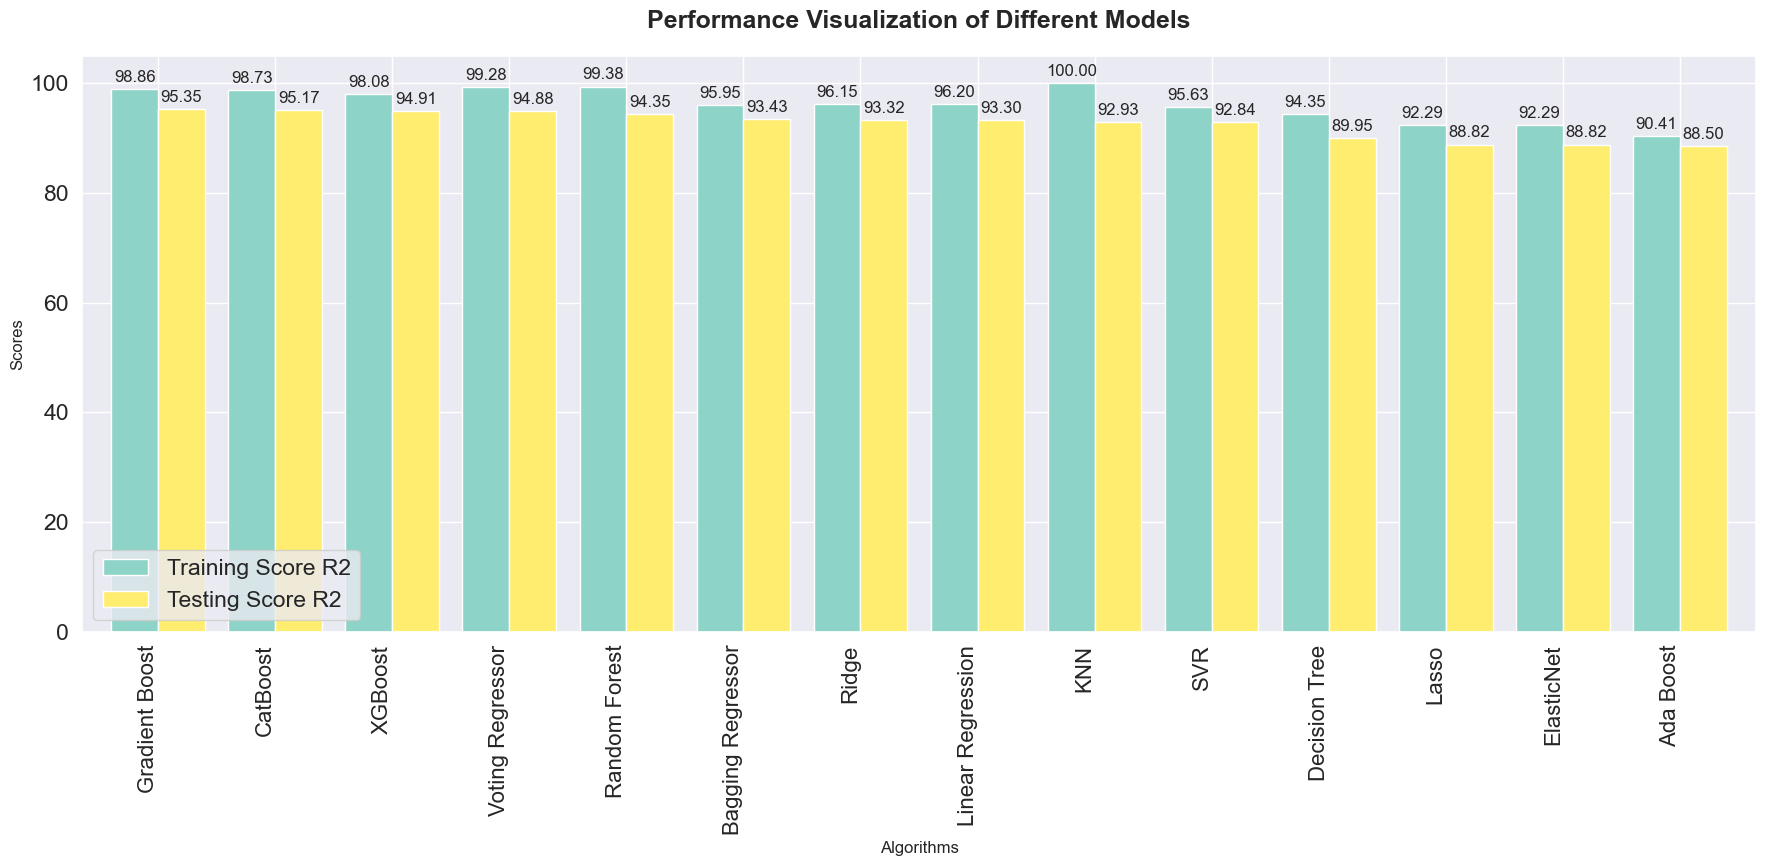

In [201]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, padding=3)

plt.tight_layout()
plt.show()

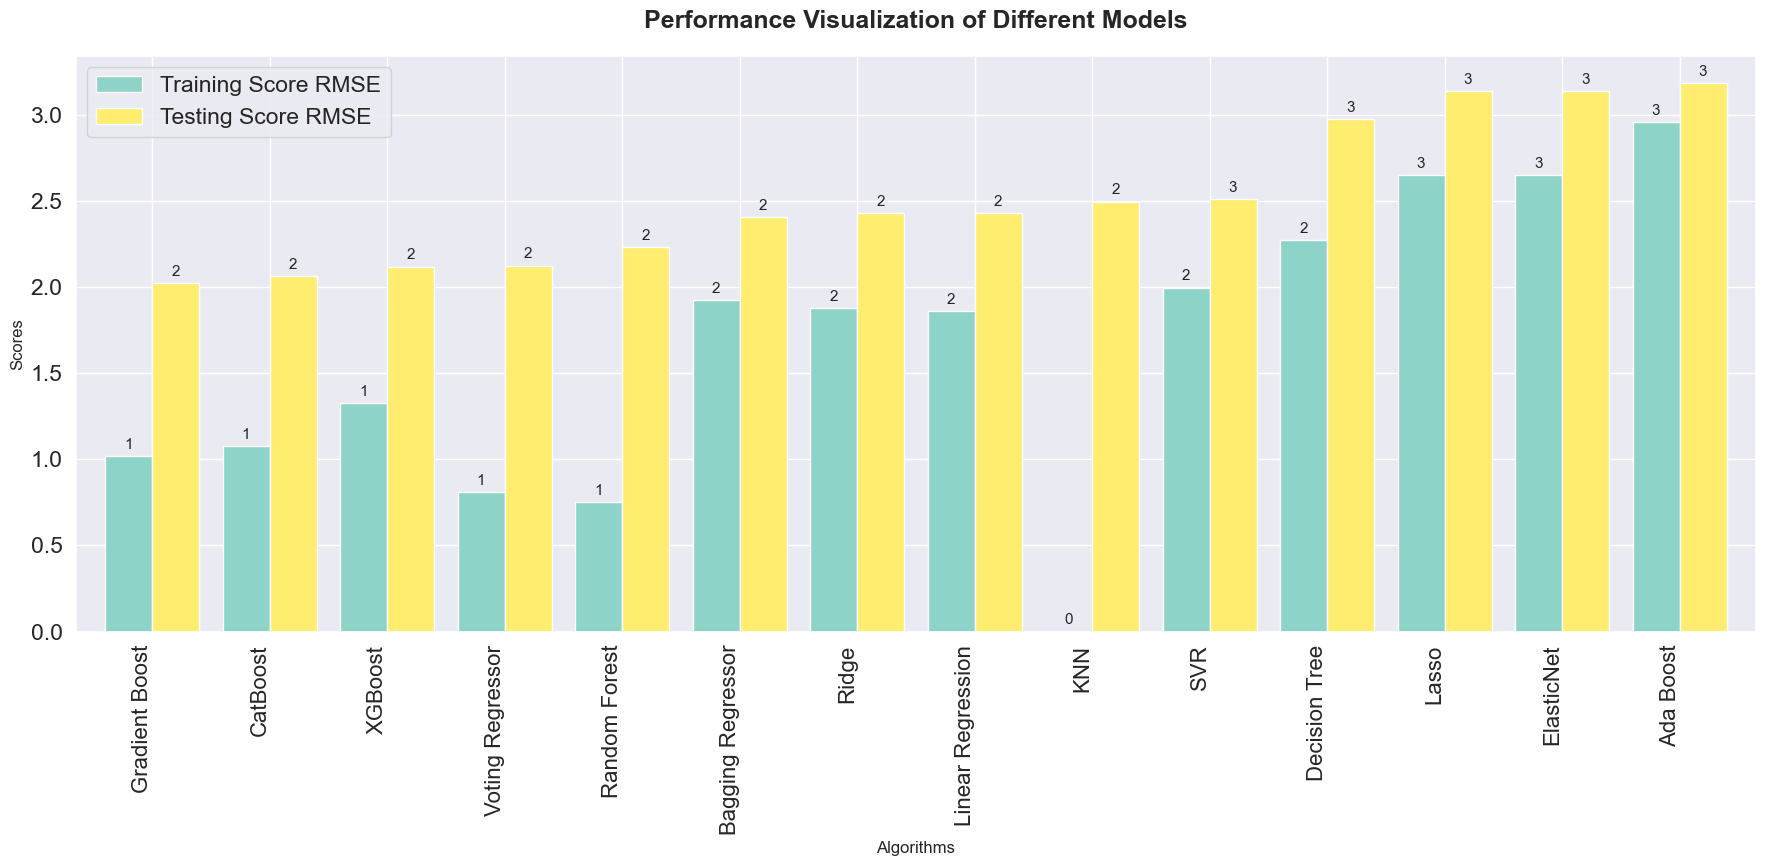

In [202]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()


### After looking at the plots we should go with the Gradient Boost
### Considering all the parameters from the above two graphs.

In [ ]:
#Best parameters : { learning_rate=0.2, max_depth=4, n_estimators=200, min_samples_split=10, random_state=3 }

In [137]:
# Create the Gradinet Boost Regressor model
gradient_boosting_regressor = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=4,
    n_estimators=200,
    min_samples_split=10,
    random_state=3
)

# Fit the model
gradient_boosting_regressor.fit(x_train, y_train)    

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_split=10,
                          n_estimators=200, random_state=3)

In [138]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import joblib

# Define features
numerical_cols = ["Adult Mortality","Infant Deaths", "Alcohol", "Percentage Expenditure", "Hepatitis B", 
                  "Measles", "Under-Five Deaths", "Polio", "Diphtheria", "Hiv/Aids", "Gdp", "Population", 
                  "Thinness 1-19 Years", "Thinness 5-9 Years", "Income Composition Of Resources"]

categorical_cols = ["Country", "Status"]

# Assuming df is already loaded and cleaned
X = df[numerical_cols + categorical_cols]
y = df["Life Expectancy"]  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        learning_rate=0.2,
        max_depth=4,
        n_estimators=200,
        min_samples_split=10,
        random_state=3
    ))
])

# Train
pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(pipeline, "life_expectancy_pipeline.pkl")


['life_expectancy_pipeline.pkl']

In [139]:
import streamlit as st
import pandas as pd
import joblib

# Load pipeline
model = joblib.load("life_expectancy_pipeline.pkl")

# Load data just to get list of countries
@st.cache_data
def load_countries():
    df = pd.read_csv("Life Expectancy Data.csv")
    return sorted(df["Country"].dropna().unique())

all_countries = load_countries()

st.title("Life Expectancy Predictor")

def user_input_features():
    input_data = {}

    # Numerical features
    input_data["Adult Mortality"] = st.number_input("Adult Mortality", 0.0, 1000.0, 150.0)
    input_data["Infant Deaths"] = st.number_input("Infant Deaths", 0.0, 100.0, 5.0)
    input_data["Alcohol"] = st.number_input("Alcohol Consumption", 0.0, 20.0, 5.0)
    input_data["Percentage Expenditure"] = st.number_input("Percentage Expenditure", 0.0, 100000.0, 1000.0)
    input_data["Hepatitis B"] = st.number_input("Hepatitis B (%)", 0.0, 100.0, 85.0)
    input_data["Measles"] = st.number_input("Measles", 0.0, 100000.0, 1000.0)
    input_data["Under-Five Deaths"] = st.number_input("Under-Five Deaths", 0.0, 500.0, 30.0)
    input_data["Polio"] = st.number_input("Polio (%)", 0.0, 100.0, 80.0)
    input_data["Diphtheria"] = st.number_input("Diphtheria (%)", 0.0, 100.0, 85.0)
    input_data["Hiv/Aids"] = st.number_input("HIV/AIDS", 0.0, 50.0, 0.1)
    input_data["Gdp"] = st.number_input("GDP", 0.0, 100000.0, 1000.0)
    input_data["Population"] = st.number_input("Population", 0.0, 2e9, 1e7)
    input_data["Thinness 1-19 Years"] = st.number_input("Thinness 1-19 Years", 0.0, 50.0, 10.0)
    input_data["Thinness 5-9 Years"] = st.number_input("Thinness 5-9 Years", 0.0, 50.0, 10.0)
    input_data["Income Composition Of Resources"] = st.number_input("Income Composition of Resources", 0.0, 1.0, 0.5)

    # Categorical features
    input_data["Country"] = st.selectbox("Country", all_countries)
    input_data["Status"] = st.selectbox("Status", ['Developing', 'Developed'])

    return pd.DataFrame([input_data])

input_df = user_input_features()

if st.button("Predict Life Expectancy"):
    prediction = model.predict(input_df)
    st.success(f"Predicted Life Expectancy: {prediction[0]:.2f} years")


2025-06-19 00:09:14.897 No runtime found, using MemoryCacheStorageManager


In [140]:
app_code = '''
import streamlit as st
import pandas as pd
import joblib

# Load pipeline
model = joblib.load("life_expectancy_pipeline.pkl")

# Load data just to get list of countries
@st.cache_data
def load_countries():
    df = pd.read_csv("Life Expectancy Data.csv")
    return sorted(df["Country"].dropna().unique())

all_countries = load_countries()

st.title("Life Expectancy Predictor")

def user_input_features():
    input_data = {}

    # Numerical features
    input_data["Adult Mortality"] = st.number_input("Adult Mortality", 0.0, 1000.0, 150.0)
    input_data["Infant Deaths"] = st.number_input("Infant Deaths", 0.0, 100.0, 5.0)
    input_data["Alcohol"] = st.number_input("Alcohol Consumption", 0.0, 20.0, 5.0)
    input_data["Percentage Expenditure"] = st.number_input("Percentage Expenditure", 0.0, 100000.0, 1000.0)
    input_data["Hepatitis B"] = st.number_input("Hepatitis B (%)", 0.0, 100.0, 85.0)
    input_data["Measles"] = st.number_input("Measles", 0.0, 100000.0, 1000.0)
    input_data["Under-Five Deaths"] = st.number_input("Under-Five Deaths", 0.0, 500.0, 30.0)
    input_data["Polio"] = st.number_input("Polio (%)", 0.0, 100.0, 80.0)
    input_data["Diphtheria"] = st.number_input("Diphtheria (%)", 0.0, 100.0, 85.0)
    input_data["Hiv/Aids"] = st.number_input("HIV/AIDS", 0.0, 50.0, 0.1)
    input_data["Gdp"] = st.number_input("GDP", 0.0, 100000.0, 1000.0)
    input_data["Population"] = st.number_input("Population", 0.0, 2e9, 1e7)
    input_data["Thinness 1-19 Years"] = st.number_input("Thinness 1-19 Years", 0.0, 50.0, 10.0)
    input_data["Thinness 5-9 Years"] = st.number_input("Thinness 5-9 Years", 0.0, 50.0, 10.0)
    input_data["Income Composition Of Resources"] = st.number_input("Income Composition of Resources", 0.0, 1.0, 0.5)

    # Categorical features
    input_data["Country"] = st.selectbox("Country", all_countries)
    input_data["Status"] = st.selectbox("Status", ['Developing', 'Developed'])

    return pd.DataFrame([input_data])

input_df = user_input_features()

if st.button("Predict Life Expectancy"):
    prediction = model.predict(input_df)
    st.success(f"Predicted Life Expectancy: {prediction[0]:.2f} years")

'''

# Write the file using safe encoding
with open("app.py", "w", encoding="utf-8") as f:
    f.write(app_code)

print("✅ app.py has been created successfully.")


✅ app.py has been created successfully.


In [ ]:
Path to my file
Step 1 - D:
Step 2 - cd "Data_science\Life Expectancy Prediction"
Step 3 - streamlit run app.py